In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tabulate as tabulate
import warnings
warnings.filterwarnings("ignore")

In [3]:
movie_data=pd.read_csv("D:\\project file\\tmdb_movies.csv")

In [4]:
movie_data.head(5)

,budget,genres,id,title,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,actors,director,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,Avatar,en,150.437577,'Ingenious Film Partners','United States of America',12/10/2009,2787965087,162,Released,7.2,11800,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron,2550965087
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,Pirates of the Caribbean: At World's End,en,139.082615,'Walt Disney Pictures','United States of America',19-05-2007,961000000,169,Released,6.9,4500,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski,661000000
2,245000000,"['Action', 'Adventure', 'Crime']",206647,Spectre,en,107.376788,'Columbia Pictures','United Kingdom',26-10-2015,880674609,148,Released,6.3,4466,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes,635674609
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,The Dark Knight Rises,en,112.312950,'Legendary Pictures','United States of America',16-07-2012,1084939099,165,Released,7.6,9106,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan,834939099
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,John Carter,en,43.926995,'Walt Disney Pictures','United States of America',3/7/2012,284139100,132,Released,6.1,2124,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton,24139100


In [5]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   title                 4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   popularity            4803 non-null   float64
 6   production_companies  4452 non-null   object 
 7   production_countries  4629 non-null   object 
 8   release_date          4802 non-null   object 
 9   revenue               4803 non-null   int64  
 10  runtime               4803 non-null   int64  
 11  status                4803 non-null   object 
 12  vote_average          4803 non-null   float64
 13  vote_count            4803 non-null   int64  
 14  actors                4803 non-null   object 
 15  director             

## Data preprocessing

#### ================================
#### Step-1: Changing Data Types of Columns
#### ================================

In [6]:
movie_data["release_date"] = movie_data["release_date"].astype(str).str.replace(r"[/.]", "-", regex=True)


In [7]:
# Convert the 'release_date' column to datetime format, assuming dates are in 'day-month-year' format


movie_data["release_date"]=pd.to_datetime(movie_data["release_date"],format="%d-%m-%Y")

In [8]:
movie_data.dtypes

budget                           int64
genres                          object
id                               int64
title                           object
original_language               object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                          int64
status                          object
vote_average                   float64
vote_count                       int64
actors                          object
director                        object
profit                           int64
dtype: object

#### ================================
#### Step-2: Missing  value Treatment
#### ================================

In [9]:
def seprate_data_types(data):
    categorical=data.select_dtypes(["object","category"]).columns.to_list()
    numerical=data.select_dtypes(["number"]).columns.to_list()
    return categorical,numerical
    
categorical,numerical=seprate_data_types(movie_data)

table=[categorical,numerical]

print(tabulate.tabulate({"categorical_data" : categorical,
                        "numerical_data" : numerical},
                         headers=["categorical","numerical"]))

categorical           numerical
--------------------  ------------
genres                budget
title                 id
original_language     popularity
production_companies  revenue
production_countries  runtime
status                vote_average
actors                vote_count
director              profit


In [10]:
movie_data[(movie_data["actors"]=="[]")]     # Some rows in the 'actors' column are blank strings, so replace them with NaN values

,budget,genres,id,title,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,actors,director,profit
2601,0,['Family'],17644,Barney's Great Adventure,en,0.722911,'PolyGram Filmed Entertainment','United States of America',1998-01-01,0,76,Released,2.9,8,[],Steve Gomer,0
3669,0,['Family'],447027,Running Forever,en,0.028756,'New Kingdom Pictures','United States of America',2015-10-27,0,88,Released,0.0,0,[],NaN,0
3991,0,['Unknown'],346081,Sardaarji,en,0.296981,NaN,'India',2015-06-26,0,0,Released,9.5,2,[],Rohit Jugraj,0
4008,2500000,['Documentary'],126509,2016: Obama's America,en,0.973582,NaN,'United States of America',2012-07-13,33400000,87,Released,4.6,19,[],John Sullivan,30900000
4067,0,['Unknown'],371085,Sharkskin,en,0.027801,NaN,NaN,2015-01-01,0,0,Released,0.0,0,[],NaN,0
4117,0,['Unknown'],325140,Hum To Mohabbat Karega,en,0.001186,NaN,NaN,2000-05-26,0,0,Released,0.0,0,[],NaN,0
4245,1,"['Romance', 'Comedy', 'Drama']",361505,Me You and Five Bucks,en,0.094105,NaN,NaN,2015-07-07,0,90,Released,10.0,2,[],NaN,-1
4303,0,"['Comedy', 'Music']",114065,Down & Out With The Dolls,en,0.002386,NaN,NaN,2003-03-20,0,88,Released,0.0,0,[],NaN,0
4312,1200000,['Unknown'],137955,Crowsnest,en,0.057564,NaN,'Canada',2012-01-01,0,84,Released,4.8,12,[],NaN,-1200000
4320,0,['Documentary'],102840,Sex With Strangers,en,0.014406,NaN,NaN,2002-02-22,0,0,Released,5.0,1,[],NaN,0


In [11]:
movie_data["actors"].replace("[]",np.NaN,inplace=True)    # '[]' is a string (not a real list), replace it with NaN

In [12]:
movie_data["genres"].replace("[]",np.NaN,inplace=True)

In [13]:
movie_data["genres"].replace("['Unknown']",np.NaN,inplace=True)

In [14]:
movie_data[(movie_data["runtime"]==0) & (movie_data["status"]=="Released")] # Runtime = 0 is often a placeholder or missing value that wasn’t properly recorded.

,budget,genres,id,title,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,actors,director,profit
1011,0,['Horror'],53953,The Tooth Fairy,de,0.716764,NaN,NaN,2006-08-08,0,0,Released,4.3,13,"['Lochlyn Munro', 'Chandra West', 'Steve Bacic...",Chuck Bowman,0
3111,0,"['Drama', 'Crime']",41894,Blood Done Sign My Name,en,0.397341,NaN,NaN,2010-01-02,0,0,Released,6.0,5,"['Natalie Alyn Lind', 'Michael Rooker', 'Emily...",Jeb Stuart,0
3668,0,"['Comedy', 'Drama']",113406,Should've Been Romeo,en,0.407030,'Phillybrook Films','United States of America',2012-04-28,0,0,Released,0.0,0,"['Paul Ben-Victor', 'Ed Asner', 'Jordenn Thomp...",Marcia Bennett,0
3808,4000000,"['Comedy', 'Romance', 'TV Movie']",158150,How to Fall in Love,en,1.923514,'Annuit Coeptis Entertainment Inc.','United States of America',2012-07-21,0,0,Released,5.2,20,"[""Brooke D'Orsay"", 'Eric Mabius', 'Jody Thomps...",Mark Griffiths,-4000000
3952,0,"['War', 'Drama', 'History']",281230,Fort McCoy,en,0.384496,NaN,NaN,2014-01-01,0,0,Released,6.3,2,"['Eric Stoltz', 'Kate Connor', 'Lyndsy Fonseca...",Michael Worth,0
3991,0,NaN,346081,Sardaarji,en,0.296981,NaN,'India',2015-06-26,0,0,Released,9.5,2,NaN,Rohit Jugraj,0
4067,0,NaN,371085,Sharkskin,en,0.027801,NaN,NaN,2015-01-01,0,0,Released,0.0,0,NaN,NaN,0
4117,0,NaN,325140,Hum To Mohabbat Karega,en,0.001186,NaN,NaN,2000-05-26,0,0,Released,0.0,0,NaN,NaN,0
4203,0,"['Drama', 'Crime', 'Thriller']",66468,N-Secure,en,0.134560,NaN,NaN,2010-10-15,2592808,0,Released,4.3,4,"['Cordell Moore', 'Essence Atkins', 'Denise Bo...",David M. Matthews,2592808
4208,0,['Romance'],74084,Dil Jo Bhi Kahey...,hi,0.122704,'Entertainment One Pvt. Ltd.','India',2006-07-12,0,0,Released,0.0,0,"['Amitabh Bachchan', 'Revathi', 'Karan Sharma'...",Romesh Sharma,0


In [15]:
mean=round(movie_data["runtime"].mean())
mean



107

In [16]:
movie_data.loc[(movie_data["runtime"] == 0) & (movie_data["status"] == "Released"), "runtime"] = mean


In [17]:
print("----Missing values before treatment----")

movie_data.isnull().sum()


----Missing values before treatment----


budget                    0
genres                   28
id                        0
title                     0
original_language         0
popularity                0
production_companies    351
production_countries    174
release_date              1
revenue                   0
runtime                   0
status                    0
vote_average              0
vote_count                0
actors                   43
director                 30
profit                    0
dtype: int64

In [18]:
# Fill missing values in categorical columns using mode

movie_data["production_companies"].fillna(movie_data["production_companies"].mode()[0],inplace=True)      

In [19]:
movie_data["production_countries"].fillna(movie_data["production_countries"].mode()[0],inplace=True)

In [20]:

movie_data["director"].fillna(movie_data["director"].mode()[0],inplace=True)

In [21]:
movie_data["genres"].fillna(movie_data["genres"].mode()[0],inplace=True)

In [22]:
movie_data["release_date"].fillna(movie_data["release_date"].mode()[0],inplace=True)

In [23]:
movie_data["actors"].fillna(movie_data["actors"].mode()[0],inplace=True)

In [24]:
print("----Missing values after treatment----")

movie_data.isnull().sum()


----Missing values after treatment----


budget                  0
genres                  0
id                      0
title                   0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
status                  0
vote_average            0
vote_count              0
actors                  0
director                0
profit                  0
dtype: int64

#### ================================
#### Step-3: Converting List-like Strings to Readable Text Format
#### ================================

In [25]:
movie_data.head(2)

,budget,genres,id,title,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,actors,director,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,Avatar,en,150.437577,'Ingenious Film Partners','United States of America',2009-10-12,2787965087,162,Released,7.2,11800,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron,2550965087
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,Pirates of the Caribbean: At World's End,en,139.082615,'Walt Disney Pictures','United States of America',2007-05-19,961000000,169,Released,6.9,4500,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski,661000000


In [26]:
import ast


In [27]:
# Columns that contain list-like strings

cols_to_convert = ['genres','actors']

for col in cols_to_convert:
    movie_data[col] = movie_data[col].apply(lambda x: ', '.join(ast.literal_eval(x)))

In [28]:
movie_data.head(2)

,budget,genres,id,title,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,actors,director,profit
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,Avatar,en,150.437577,'Ingenious Film Partners','United States of America',2009-10-12,2787965087,162,Released,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087
1,300000000,"Adventure, Fantasy, Action",285,Pirates of the Caribbean: At World's End,en,139.082615,'Walt Disney Pictures','United States of America',2007-05-19,961000000,169,Released,6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",Gore Verbinski,661000000


In [29]:
# Cleaning Extra Quotes from 'production_companies & production_countries'

movie_data['production_companies'] = movie_data['production_companies'].str.strip(r"[\"']")


In [30]:
movie_data['production_countries'] = movie_data['production_countries'].str.strip("'")


In [31]:
movie_data['actors'] = movie_data['actors'].str.strip(r"[\"]")


In [32]:
movie_data.head(2)

,budget,genres,id,title,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,actors,director,profit
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,Avatar,en,150.437577,Ingenious Film Partners,United States of America,2009-10-12,2787965087,162,Released,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087
1,300000000,"Adventure, Fantasy, Action",285,Pirates of the Caribbean: At World's End,en,139.082615,Walt Disney Pictures,United States of America,2007-05-19,961000000,169,Released,6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",Gore Verbinski,661000000


#### ================================
#### Step-3: Handling Duplicates
#### ================================

In [33]:
# check Duplicate value in a data

movie_data.duplicated().sum()

0

No duplicated rows found in the dataset


#### ================================
#### Step-4: Outlier Detection and Treatment
#### ================================

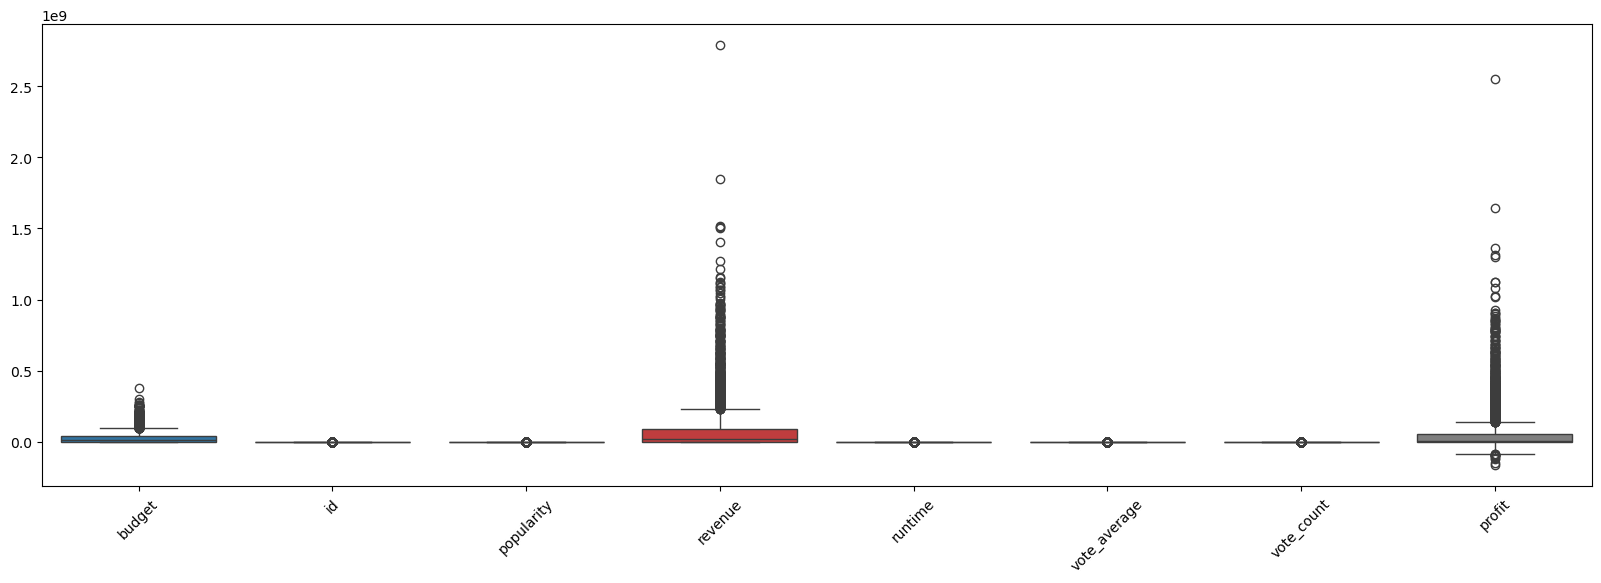

In [34]:
# First, check if outliers are present in the data using a box plot

sns.boxplot(data=movie_data)  
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=45)
plt.show()

In [35]:
def iqr_winsorization(data,thresh=1.5):
    data_m=data.copy()
    numeric_cols = ["popularity","runtime","vote_average","vote_count"]

    
    for i in numeric_cols:

        Q1=data_m[i].quantile(0.25)
        Q3=data_m[i].quantile(0.75)
        IQR=Q3-Q1
        UF=Q3+thresh*IQR
        LF=Q1-thresh*IQR
        data_m.loc[data_m[i]>UF,i]=UF
        data_m.loc[data_m[i]<LF,i]=LF
        
    return data_m
        

In [36]:
m_data = iqr_winsorization(movie_data)


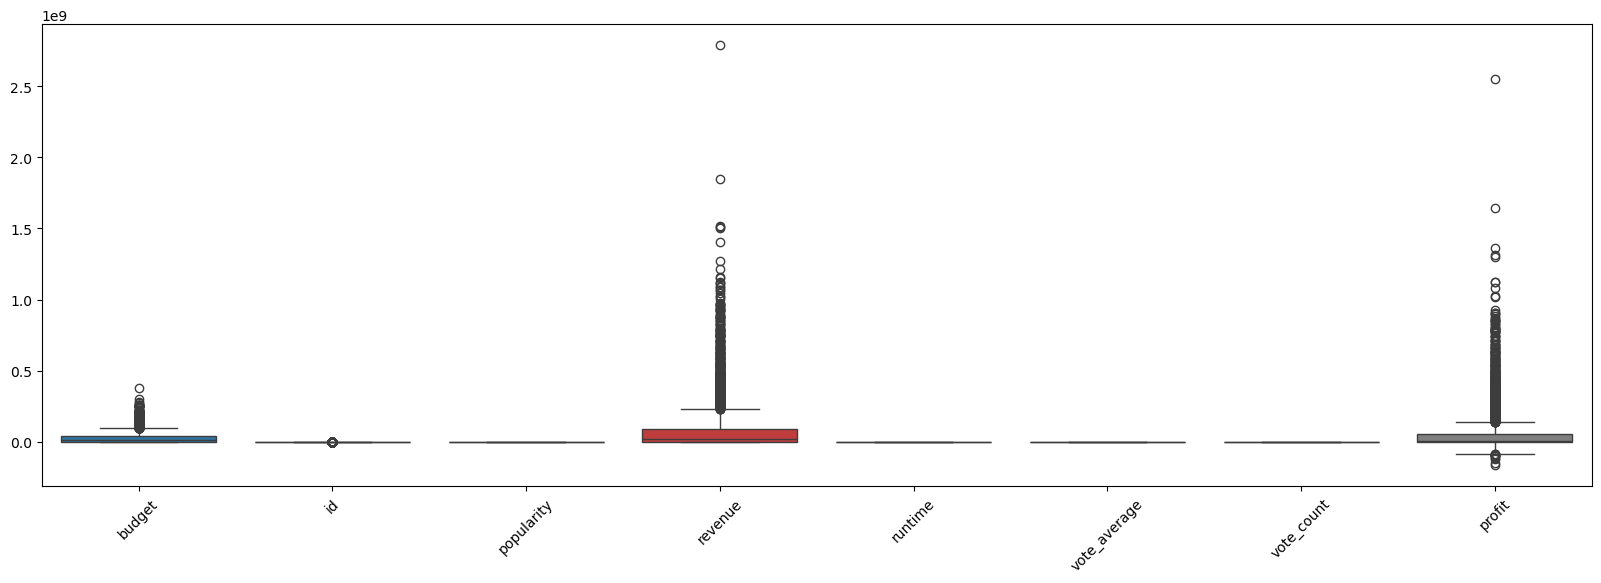

In [37]:
sns.boxplot(data=m_data)  
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=45)
plt.show()

In [38]:
m_data.head(2)

,budget,genres,id,title,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,actors,director,profit
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,Avatar,en,63.781656,Ingenious Film Partners,United States of America,2009-10-12,2787965087,152.75,Released,7.2,1761.5,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087
1,300000000,"Adventure, Fantasy, Action",285,Pirates of the Caribbean: At World's End,en,63.781656,Walt Disney Pictures,United States of America,2007-05-19,961000000,152.75,Released,6.9,1761.5,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",Gore Verbinski,661000000


### Exporting Data to a CSV File

In [278]:
movie_data.to_csv("movies_datas.csv",index=False, encoding='utf-8')

In [ ]:
m_data.to_csv("movies_datas1.csv",index=False, encoding='utf-8')

## ================================
### Exploratory data analysis
## ================================

In [38]:
def seprate_data_types(data):
    categorical=data.select_dtypes(["object","category"]).columns.to_list()
    numerical=data.select_dtypes(["number"]).columns.to_list()
    return categorical,numerical
    
categorical,numerical=seprate_data_types(m_data)

table=[categorical,numerical]

print(tabulate.tabulate({"categorical_data" : categorical,
                        "numerical_data" : numerical},
                         headers=["categorical","numerical"]))



categorical           numerical
--------------------  ------------
genres                budget
title                 id
original_language     popularity
production_companies  revenue
production_countries  runtime
status                vote_average
actors                vote_count
director              profit


#### Univariate Analysis

#### Univariate Analysis with categorical column

##### Question- Use the 'original_language' column to display the count of movies for each language using a bar chart.

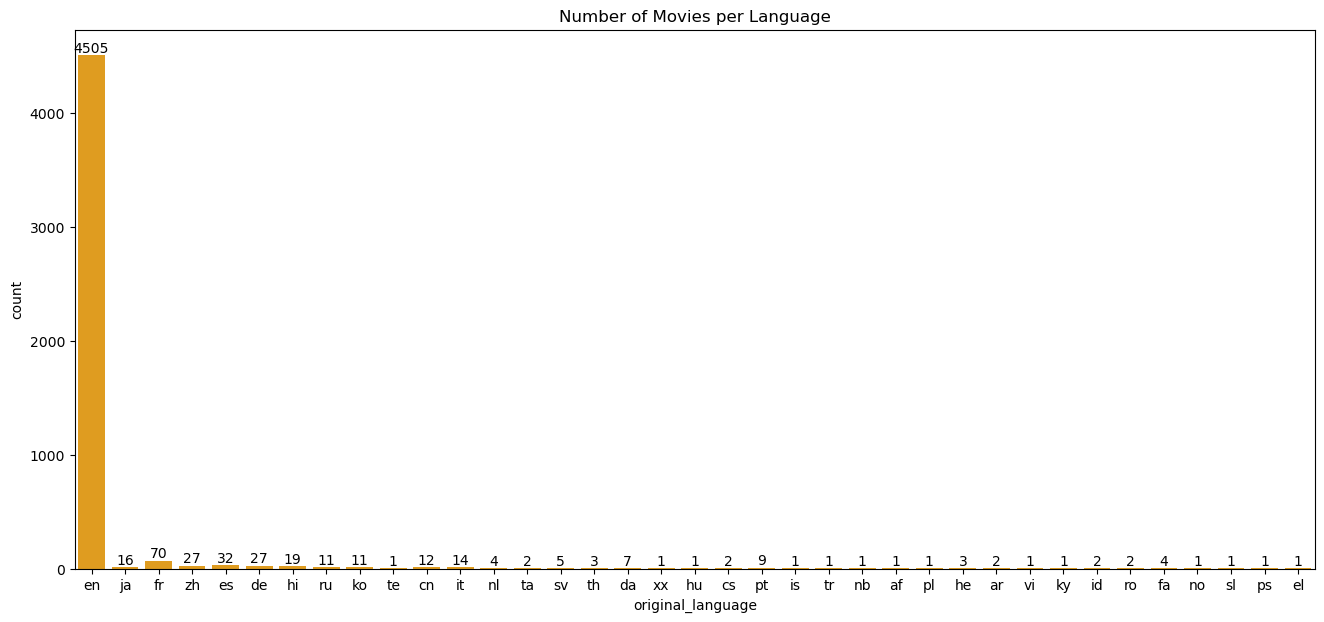

In [39]:
fig,ax=plt.subplots(figsize=(16,7))
sns.countplot(x="original_language",data=m_data,color="orange")
plt.title("Number of Movies per Language")
for i in ax.containers:
    ax.bar_label(i)


English (en) dominates the dataset with 4,503 movies, making up the vast majority of the entries.

All other languages like Japanese (ja), French (fr), Chinese (zh), Spanish (es), German (de), and Hindi (hi) have significantly fewer movies (mostly under 100 each).

##### Question- Use the 'status' column to display the count of movies status using a bar chart.

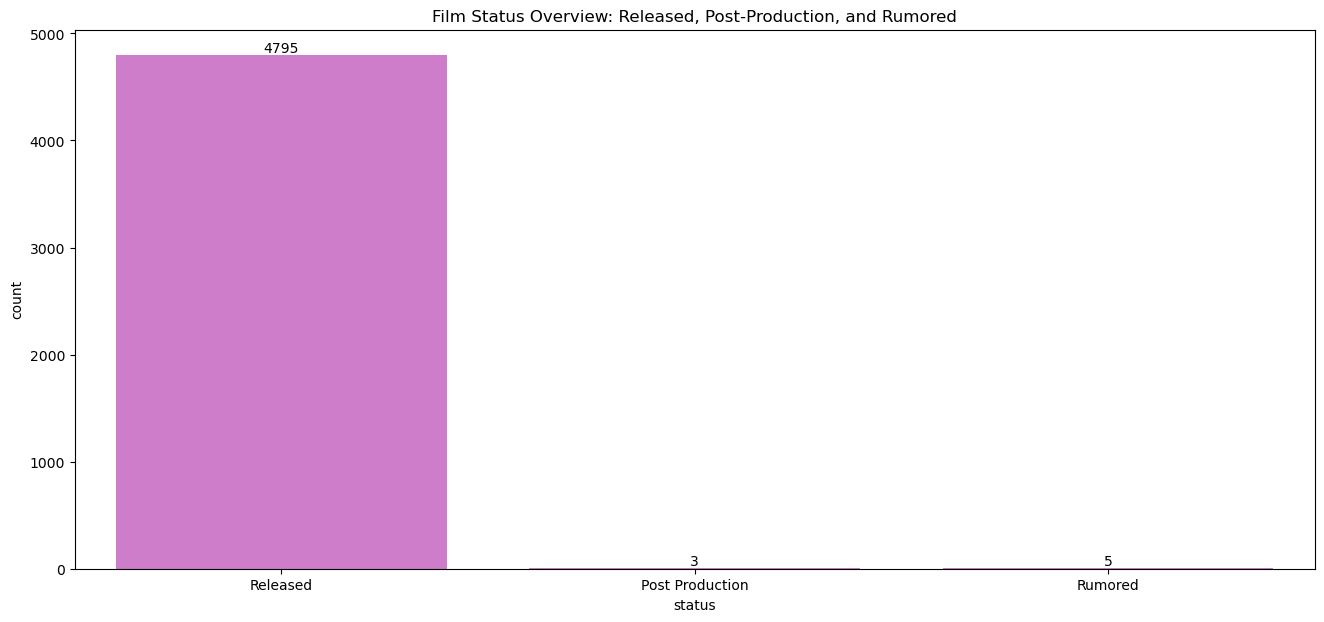

In [40]:
fig,ax=plt.subplots(figsize=(16,7))
sns.countplot(x="status",data=m_data,color="#DA70D6")
plt.title("Film Status Overview: Released, Post-Production, and Rumored")
for i in ax.containers:
    ax.bar_label(i)

The vast majority of films in this dataset (4,791) are in the "Released" status, indicating a dataset heavily skewed towards completed and publicly available productions.

In stark contrast to "Released," there are very few films currently in "Post Production" (3) or "Rumored" (5) stages. This suggests either a focus on released content, or that these other stages represent a much smaller, transient phase in the overall film lifecycle within this dataset.

##### Univariate Analysis with Numerical column

##### Question- Use the 'budget' column to analyze the distribution of movie budgets.


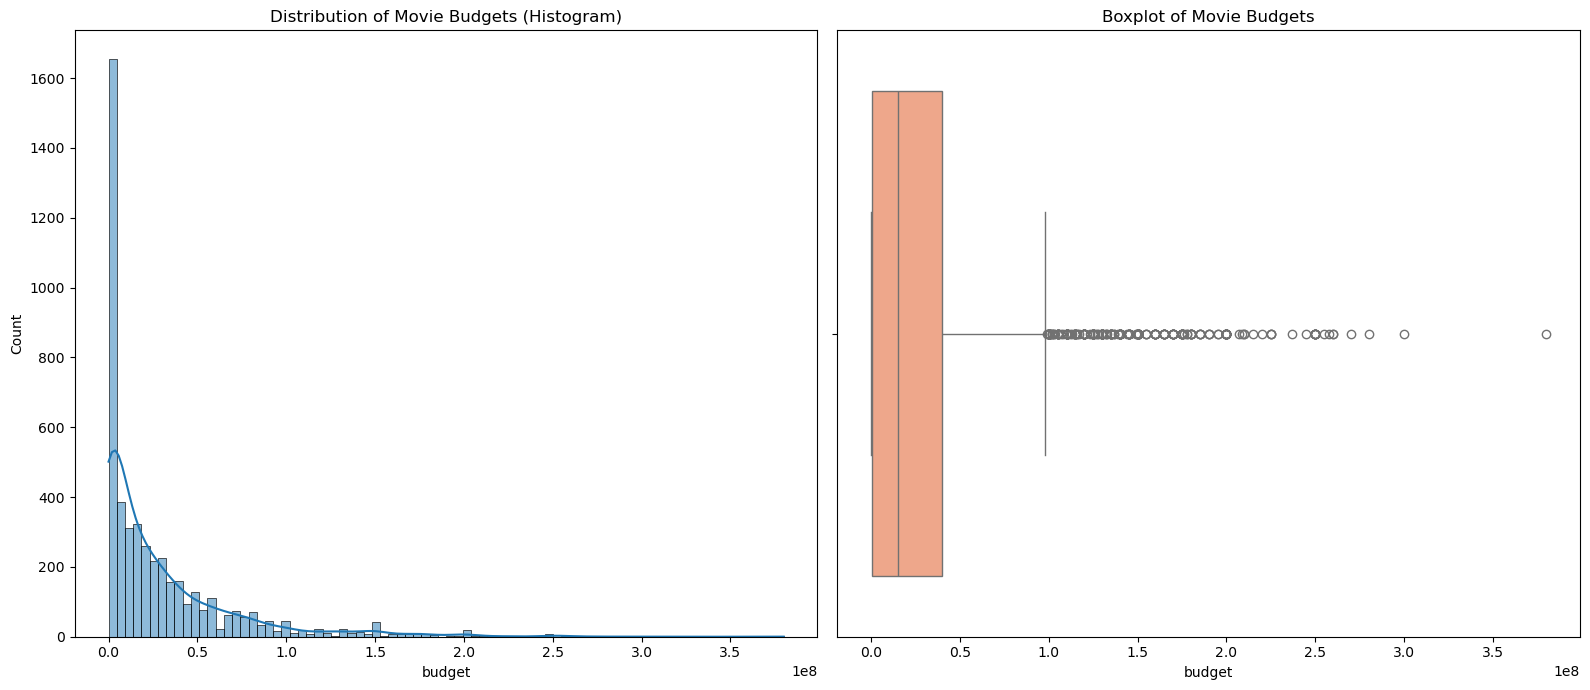

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Histogram of the 'budget' column
sns.histplot(x="budget", data=m_data, ax=ax[0], kde=True)  # kde=True adds a smooth curve

# Boxplot of the 'budget' column
sns.boxplot(x="budget", data=m_data, ax=ax[1],color="#FFA07A")

# Titles for clarity
ax[0].set_title("Distribution of Movie Budgets (Histogram)")
ax[1].set_title("Boxplot of Movie Budgets")

# Show the plot
plt.tight_layout()
plt.show()

Histogram (left): The budget distribution is right-skewed, meaning most movies have low budgets, while a few have very high budgets.

Boxplot (right): The median budget is relatively low compared to the maximum values.

##### Question- Use the 'runtime' column to analyze the distribution of movie runtime.


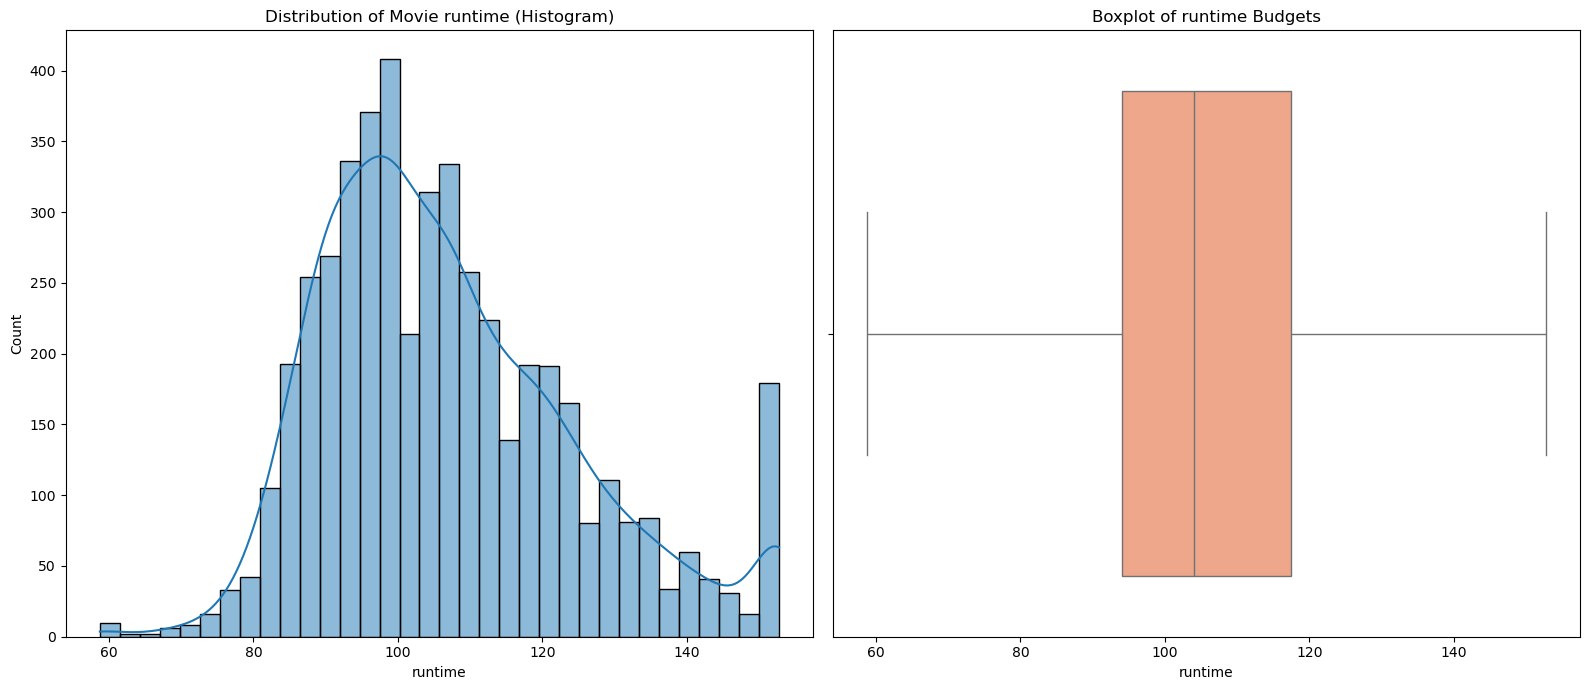

In [42]:
fig,ax=plt.subplots(1,2,figsize=(16,7))

# Histogram of the 'runtime' column
sns.histplot(x="runtime",data=m_data,ax=ax[0],kde=True)

# Boxplot of the 'runtime' column
sns.boxplot(x="runtime",data=m_data,ax=ax[1],color="#FFA07A")

# Titles for clarity
ax[0].set_title("Distribution of Movie runtime (Histogram)")
ax[1].set_title("Boxplot of runtime Budgets")

# Show the plot
plt.tight_layout()
plt.show()


Histogram (left): The distribution of movie runtimes appears to be roughly bell-shaped, peaking around 90-120 minutes. This suggests that the majority of movies in the dataset fall within this runtime range.

Boxplot (right): The thick line inside the box indicates the median runtime is approximately 90-120 minutes.


##### Question- Use the 'profit' column to analyze the distribution of movie profit.


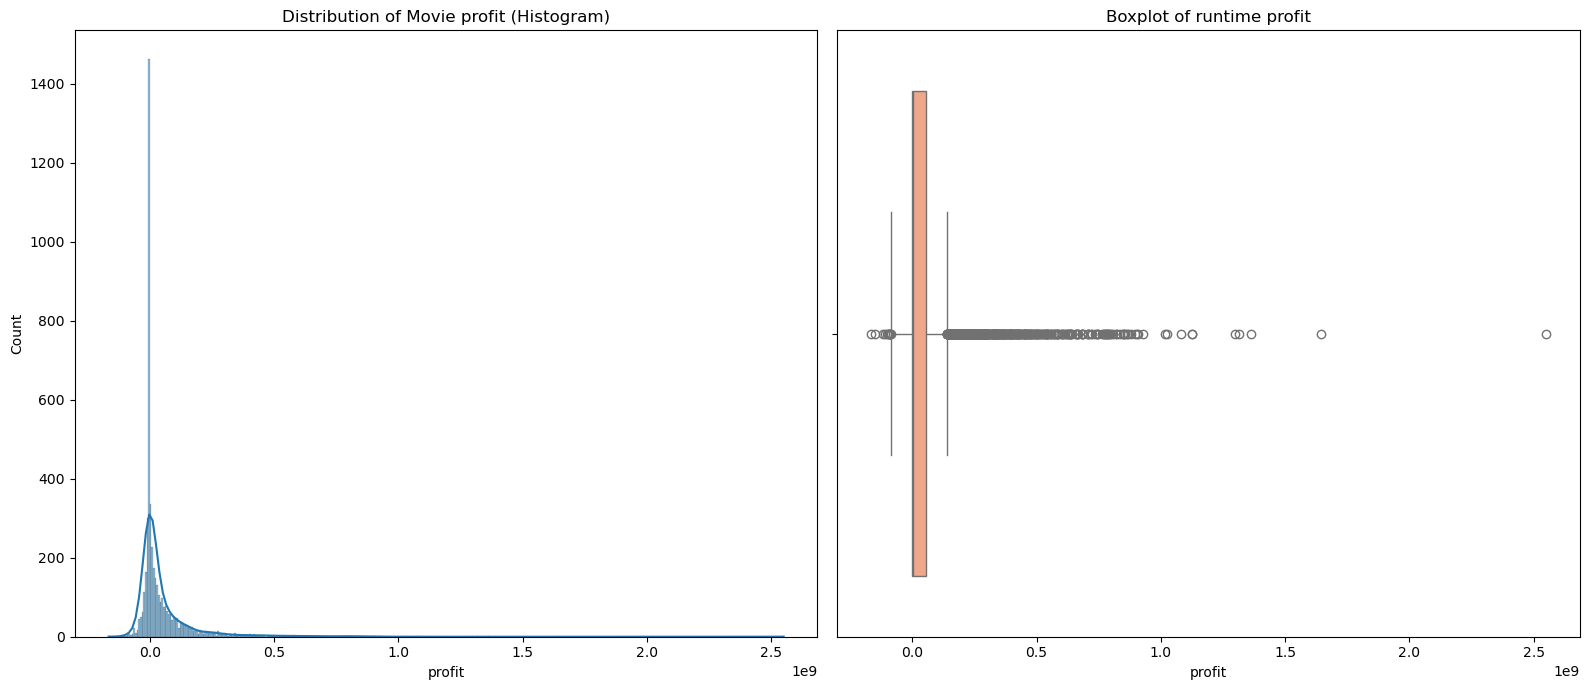

In [43]:
fig,ax=plt.subplots(1,2,figsize=(16,7))

# Histogram of the 'runtime' column
sns.histplot(x="profit",data=m_data,ax=ax[0],kde=True)

# Boxplot of the 'runtime' column
sns.boxplot(x="profit",data=m_data,ax=ax[1],color="#FFA07A")

# Titles for clarity
ax[0].set_title("Distribution of Movie profit (Histogram)")
ax[1].set_title("Boxplot of runtime profit")

# Show the plot
plt.tight_layout()
plt.show()

The distribution of movie profit is highly right-skewed, as shown in both the histogram and the boxplot. This indicates that the majority of films cluster around the break-even point, with a large number of movies making either a small profit or a loss. The median profit, represented by the line inside the boxplot, is just slightly above zero.

the data suggests that the film industry is characterized by high risk; while most movies struggle to be profitable, the immense success of a few blockbusters can lead to very high returns.

In [44]:
m_data

,budget,genres,id,title,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,actors,director,profit
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,Avatar,en,63.781656,Ingenious Film Partners,United States of America,2009-10-12,2787965087,152.75,Released,7.2,1761.5,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087
1,300000000,"Adventure, Fantasy, Action",285,Pirates of the Caribbean: At World's End,en,63.781656,Walt Disney Pictures,United States of America,2007-05-19,961000000,152.75,Released,6.9,1761.5,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",Gore Verbinski,661000000
2,245000000,"Action, Adventure, Crime",206647,Spectre,en,63.781656,Columbia Pictures,United Kingdom,2015-10-26,880674609,148.00,Released,6.3,1761.5,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",Sam Mendes,635674609
3,250000000,"Action, Crime, Drama, Thriller",49026,The Dark Knight Rises,en,63.781656,Legendary Pictures,United States of America,2012-07-16,1084939099,152.75,Released,7.6,1761.5,"Christian Bale, Michael Caine, Gary Oldman, An...",Christopher Nolan,834939099
4,260000000,"Action, Adventure, Science Fiction",49529,John Carter,en,43.926995,Walt Disney Pictures,United States of America,2012-07-03,284139100,132.00,Released,6.1,1761.5,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",Andrew Stanton,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0,Documentary,25975,My Date with Drew,en,1.929883,rusty bear entertainment,United States of America,2005-05-08,0,90.00,Released,6.3,16.0,"Drew Barrymore, Brian Herzlinger, Corey Feldma...",Brian Herzlinger,0
4799,15000000,Drama,370980,Chiamatemi Francesco - Il Papa della gente,it,0.738646,Taodue Film,Italy,2015-03-12,0,107.00,Released,7.3,12.0,Rodrigo de la Serna,Daniele Luchetti,-15000000
4800,2,Documentary,459488,"To Be Frank, Sinatra at 100",en,0.050625,Eyeline Entertainment,United Kingdom,2015-12-12,0,107.00,Released,3.8,0.0,Tony Oppedisano,Simon Napier-Bell,-2
4801,913000,Documentary,292539,Food Chains,de,0.795698,Paramount Pictures,United States of America,2014-04-26,0,83.00,Released,7.4,8.0,"William Shatner, Leonard Nimoy, DeForest Kelle...",Sanjay Rawal,-913000


### Bivariate Analysis

##### Question- Which production country has generated the highest total revenue, and how do the top 5 countries compare in terms of total revenue contribution to the global box office?

In [45]:
top_country=pd.pivot_table(m_data,index=["production_countries"],values=["revenue"],aggfunc="sum").sort_values(by="revenue",ascending=False)

In [46]:
top_10_country=top_country.head(10)
top_10_country

,revenue
production_countries,
United States of America,282971637508
United Kingdom,36856627230
Germany,16775604754
Canada,12033699886
France,8312943786
Australia,7382811052
New Zealand,7309128843
China,4612703409
Japan,4043162377


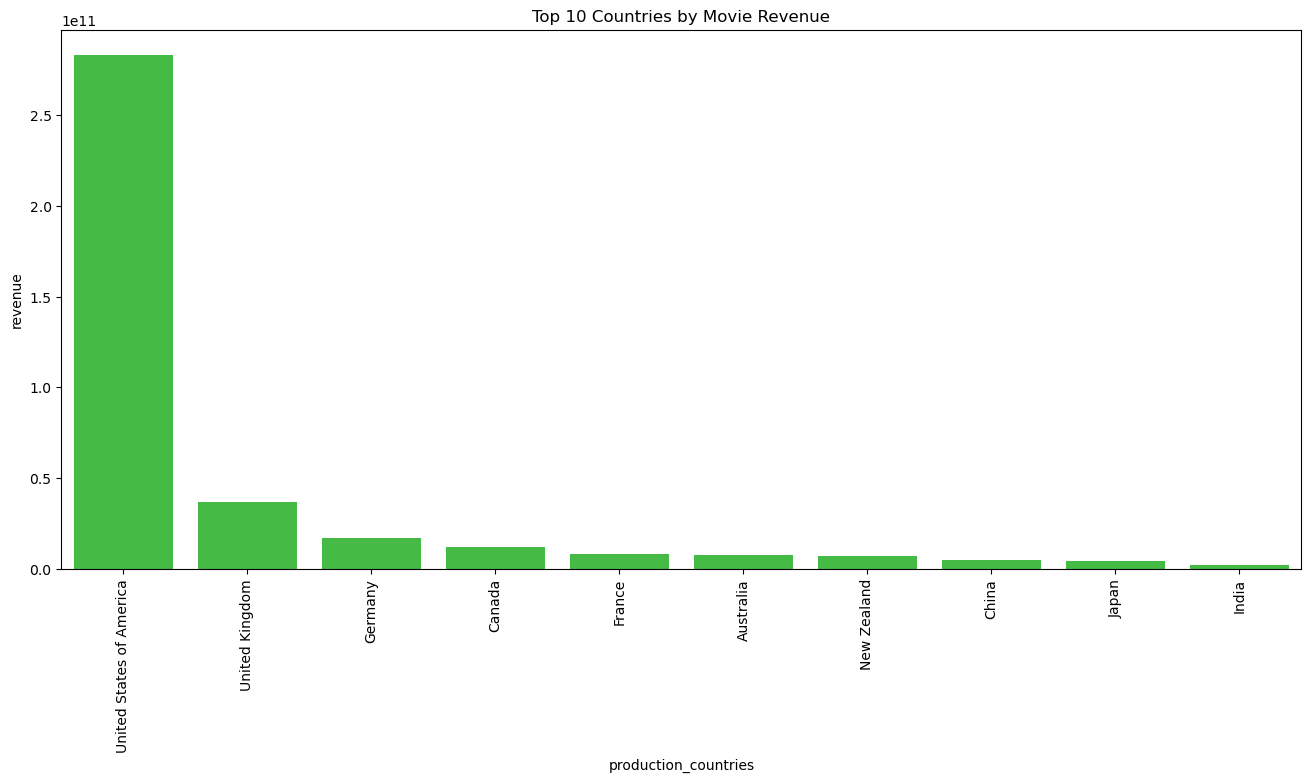

In [47]:
fig,ax=plt.subplots(figsize=(16,7))
sns.barplot(x="production_countries",y="revenue",data=top_10_country,color="#32CD32")
plt.title("Top 10 Countries by Movie Revenue")
plt.xticks(rotation=90)
plt.show()

##### Question- Which production country has incurred the highest total losses in movie production, and what trends can be observed among the top 5 loss-making countries?

In [48]:
top_Loss_making_movie_country=pd.pivot_table(m_data,index="production_countries",values="profit",aggfunc="sum").sort_values(by="profit",ascending=True)

In [49]:
d=top_Loss_making_movie_country.head(10)
d

,profit
production_countries,
Switzerland,-117794918
Malaysia,-77300000
Luxembourg,-62589251
South Africa,-42894912
Russia,-39040083
Denmark,-39018798
Libyan Arab Jamahiriya,-35000000
Aruba,-33000000
Singapore,-30000000


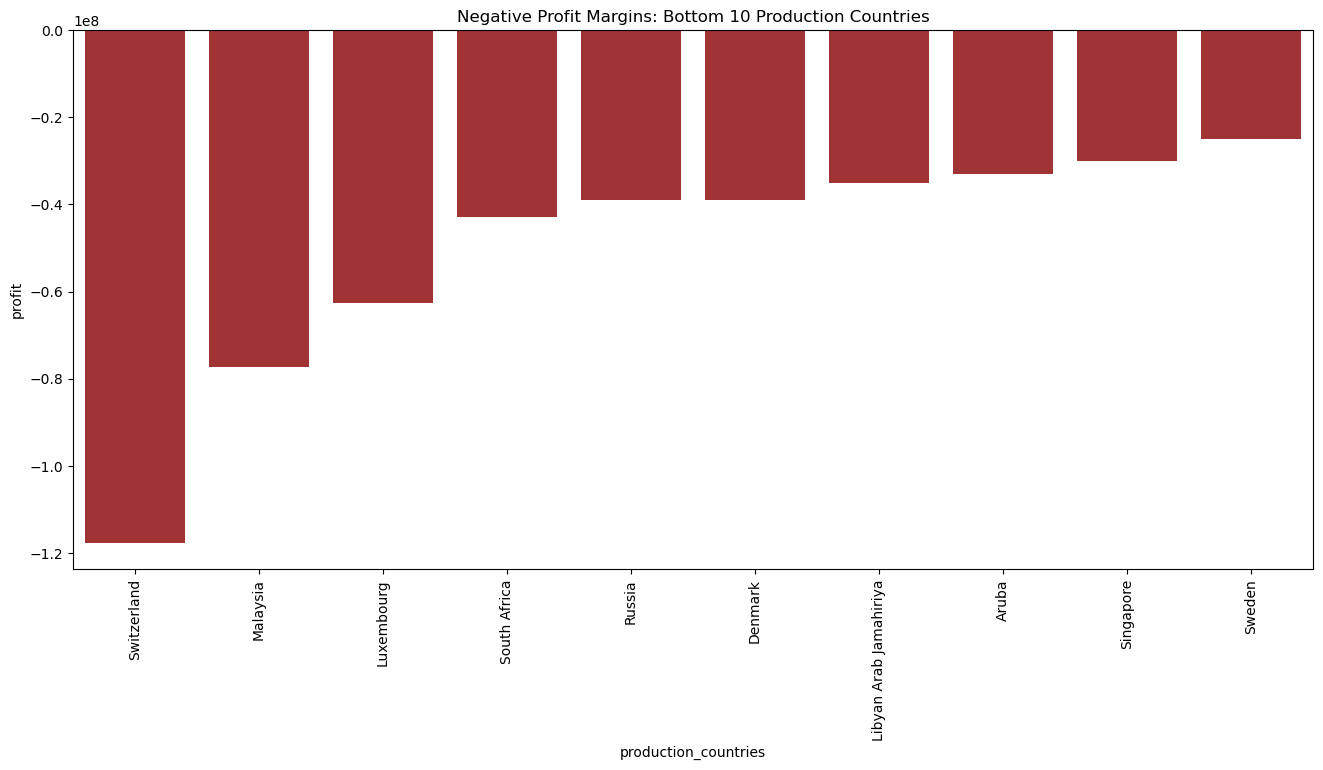

In [50]:
fig,ax=plt.subplots(figsize=(16,7))
sns.barplot(x="production_countries",y="profit",data=d,color="#B22222")
plt.title("Negative Profit Margins: Bottom 10 Production Countries")
plt.xticks(rotation=90)
plt.show()

## ================================
### Business Questions
## ================================

# FOCUS AREA 1:    Movie Performance Analysis


### Objective 1 - To support strategic film production decisions by analyzing which films generate the highest returns, what genres perform best financially, and what budget levels are associated with maximum profitability.



#### Question 1 : Which movies have generated the highest profit?

In [82]:
top_profit_movies = m_data.sort_values(by="profit",ascending=False).head(10)     # Sort movies by profit in descending order


In [83]:
# Display top 10 profitable movies

top_profit_movies[["title","genres","profit","budget","revenue"]]

,title,genres,profit,budget,revenue
0,Avatar,"Action, Adventure, Fantasy, Science Fiction",2550965087,237000000,2787965087
25,Titanic,"Drama, Romance, Thriller",1645034188,200000000,1845034188
28,Jurassic World,"Action, Adventure, Science Fiction, Thriller",1363528810,150000000,1513528810
44,Furious 7,Action,1316249360,190000000,1506249360
16,The Avengers,"Science Fiction, Action, Adventure",1299557910,220000000,1519557910
7,Avengers: Age of Ultron,"Action, Adventure, Science Fiction",1125403694,280000000,1405403694
124,Frozen,"Animation, Adventure, Family",1124219009,150000000,1274219009
546,Minions,"Family, Animation, Adventure, Comedy",1082730962,74000000,1156730962
329,The Lord of the Rings: The Return of the King,"Adventure, Fantasy, Action",1024888979,94000000,1118888979
31,Iron Man 3,"Action, Adventure, Science Fiction",1015439994,200000000,1215439994


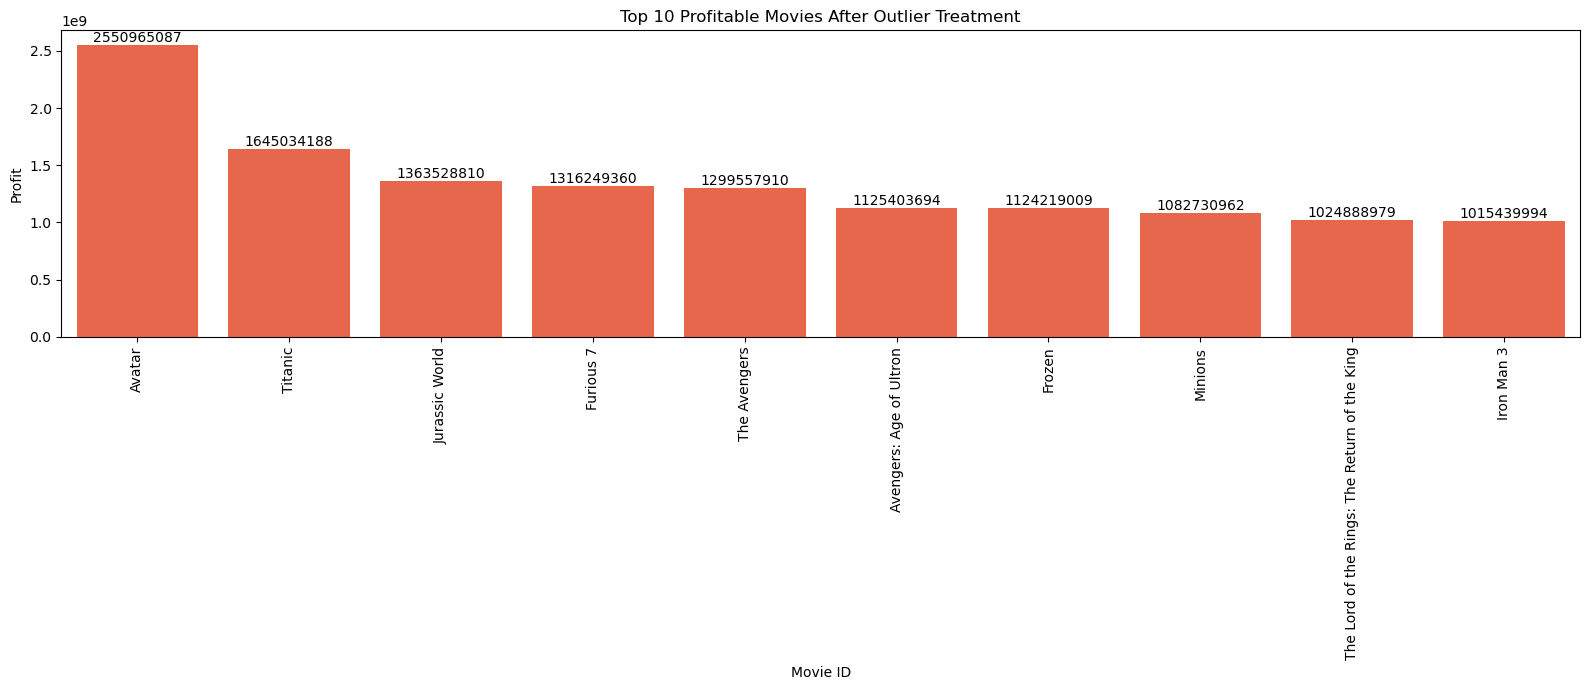

In [84]:
plt.figure(figsize=(16, 7))
barplot =sns.barplot(x="title",y="profit",data=top_profit_movies,color="#FF5733")
for i in barplot.containers:
    barplot.bar_label(i,fmt="%d")

plt.title("Top 10 Profitable Movies After Outlier Treatment")
plt.xticks(rotation=90)
plt.xlabel("Movie ID")
plt.ylabel("Profit")
plt.tight_layout()
plt.savefig("top_10_profitable_movies.png", dpi=300)
plt.show()

#### Question 2- What genre  do these high-profit movies belong to?

In [85]:
dn = m_data.copy()

# Split  genres
dn['genre_list'] = dn['genres'].str.split(', ')

# Explode both lists to get all combinations
df_explode = dn.explode('genre_list')

In [86]:
top_genre_movie=pd.pivot_table(df_explode,index=["genre_list"],values=["profit"],aggfunc="sum").sort_values(by="profit",ascending=False).head(10)
dm=top_genre_movie.reset_index()
dm

,genre_list,profit
0,Adventure,112443341088
1,Action,103516507916
2,Comedy,79170805799
3,Drama,72210844556
4,Thriller,62522930845
5,Family,57264129064
6,Fantasy,55032503330
7,Science Fiction,53816165880
8,Animation,37259146809
9,Romance,35483779802


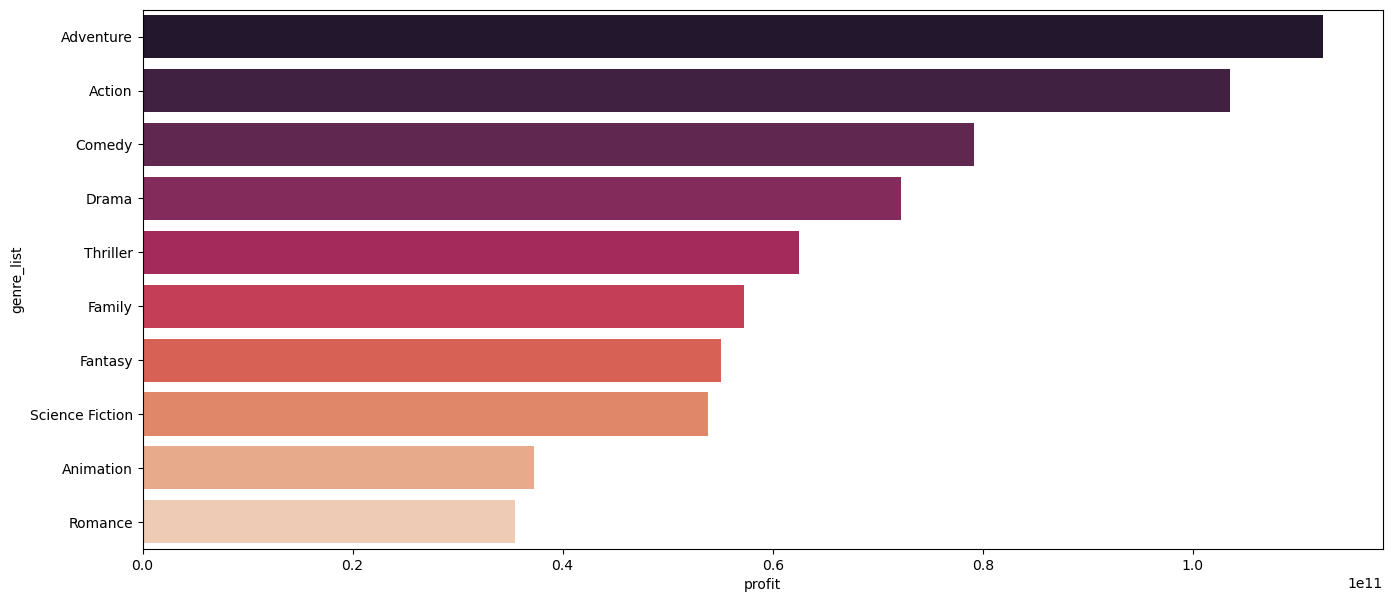

In [87]:
fig,ax=plt.subplots(figsize=(16,7))
sns.barplot(x=dm["profit"],y=dm["genre_list"],palette="rocket")
plt.show()

#### Question 3 What is the average budget range for these high-profit films?

In [88]:
threshold = m_data["profit"].quantile(0.90) # Top 10% most profitable movies
high_profit = m_data[m_data["profit"] >= threshold]

avg_budget =high_profit["budget"].mean()
print(f"average_budget $ ",avg_budget.round(2))

average_budget $  92281437.47


Having a big budget doesn't guarantee profit — it just means those top-profit films happened to have that kind of budget.

## Objective 2 : Examine how budget influences a movie’s financial return

#### Question 1- What is the relationship between budget and box office revenue?

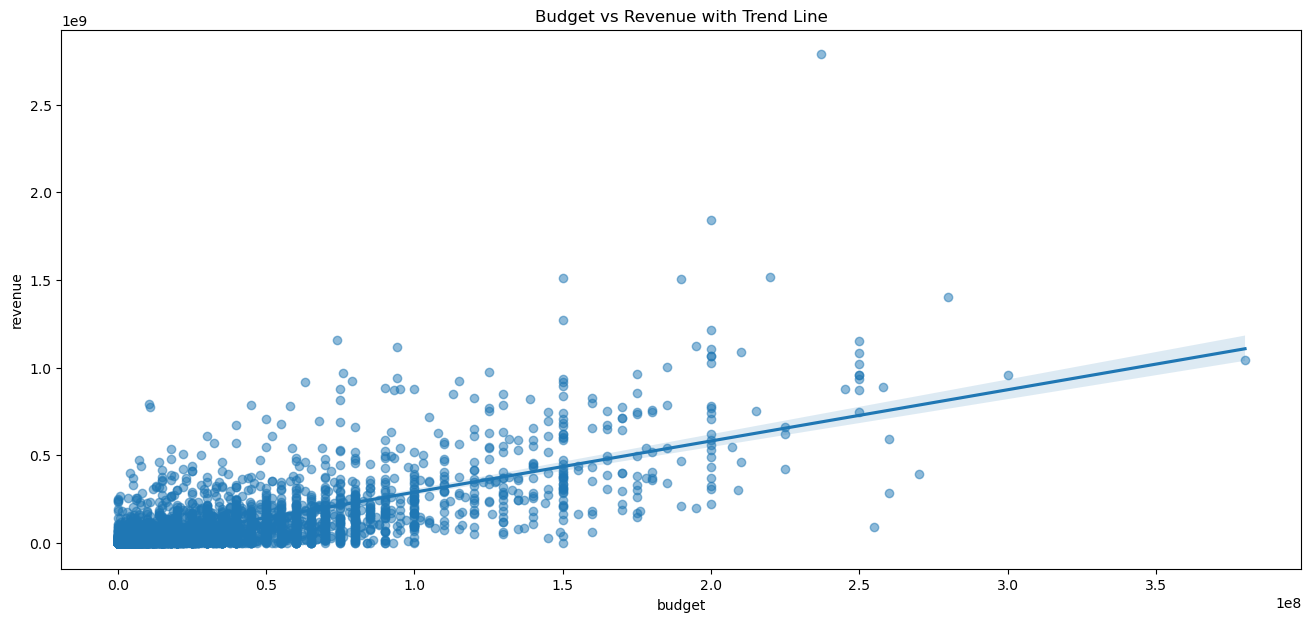

In [91]:
fig,ax=plt.subplots(figsize=(16,7))
sns.regplot(data=m_data, x="budget", y="revenue", scatter_kws={'alpha':0.5})
plt.title("Budget vs Revenue with Trend Line")
plt.savefig("budget_rebenue.png", dpi=300)
plt.show()

There seems to be a slight positive trend — as the budget increases, many movies also tend to have higher revenue.

Suggests many movies are made on a smaller budget and earn moderately.

#### Question 2   Does a higher budget always result in higher revenue?

No, a higher budget does not always result in higher revenue.

Higher budget increases the potential for higher revenue, but it doesn't guarantee it.

Success still depends on content quality, timing, audience connection, and competition.

#### Question 3-  Are there budget thresholds where ROI (Return on Investment) is maximized ?

In [92]:
# ROI tells you how efficiently a movie turned its budget into profit.

m_data['ROI'] = m_data.apply(lambda row: (row['profit'] / row['budget'])*100 if row['budget'] > 0 else 0, axis=1)

In [93]:
bins = [0, 1e6, 5e6, 10e6, 25e6, 50e6, 100e6, 200e6,300e6,400e6]
labels = ['<1M', '1–5M', '5–10M', '10–25M', '25–50M', '50–100M','100–200M','200-300m','300-400m']

m_data["budget_range"] = pd.cut(m_data["budget"], bins=bins, labels=labels)

In [94]:
roi_by_range = m_data.groupby("budget_range")["ROI"].mean().reset_index()
print(roi_by_range)

  budget_range       ROI
0          <1M 4,037,679
1         1–5M       532
2        5–10M       289
3       10–25M       228
4       25–50M       143
5      50–100M       139
6     100–200M       203
7     200-300m       256
8     300-400m       175


##### Highest ROI: <1M

This category shows an extremely high average ROI — likely due to a few low-budget breakout hits (like horror or indie films).

Even a small profit on a tiny budget leads to a massive ROI percentage.

##### Decreasing Trend:

As budget increases, ROI steadily declines.

This supports the idea that small-to-mid-budget films are often more efficient at generating profit.                                                                                              



# FOCUS AREA 2:    CAST & CREW IMPACT

## Objective 1 - To evaluate how directors influence movie success by analyzing their total profit, genre focus, and audience ratings

#### Question 1: Which directors have generated the most total profit?

In [97]:
best_director=pd.pivot_table(m_data,index="director",values="profit",aggfunc="sum").sort_values(by="profit",ascending=False).head(10)
dk=best_director.reset_index()
dk

,director,profit
0,Steven Spielberg,7468415893
1,Peter Jackson,5205642820
2,James Cameron,5136669439
3,Michael Bay,4422524638
4,Christopher Nolan,3222483234
5,Chris Columbus,3098631503
6,George Lucas,2979336893
7,Robert Zemeckis,2600622002
8,Joss Whedon,2424831068
9,Francis Lawrence,2349457182


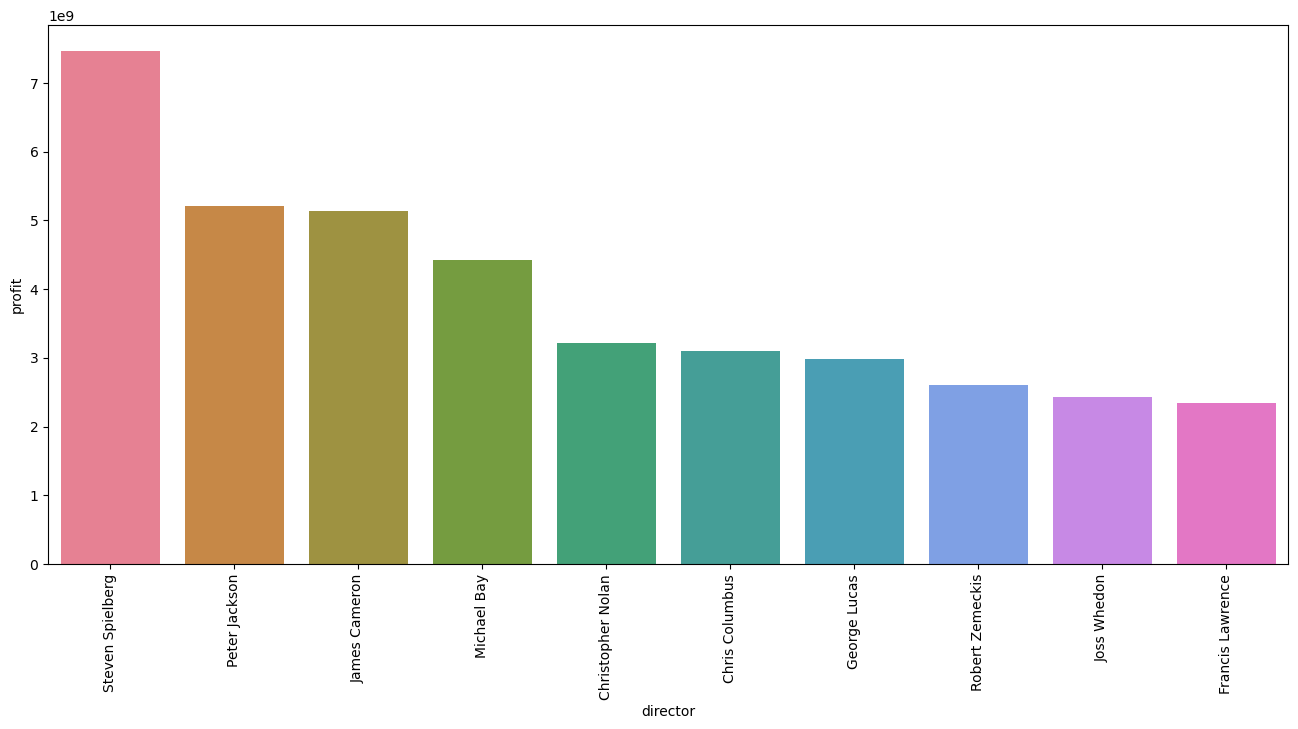

In [98]:
fig,ax=plt.subplots(figsize=(16,7))
sns.barplot(x=dk["director"],y=dk["profit"],palette="husl")
plt.xticks(rotation=90)
plt.savefig("top_10_director.png", dpi=300)
plt.show()

#### Question 2 : Do these directors work in specific genres more often?

In [99]:
top_directors = dk["director"].tolist()


In [100]:
top_director_data = m_data[m_data["director"].isin(top_directors)]


In [101]:
genre_by_director=pd.pivot_table(top_director_data,index=["director","genres"],values=["id"],aggfunc="count")
d_data=genre_by_director.reset_index()
d_data

,director,genres,id
0,Chris Columbus,"Action, Comedy, Science Fiction",1
1,Chris Columbus,"Adventure, Fantasy, Family",3
2,Chris Columbus,"Comedy, Drama, Family",1
3,Chris Columbus,"Comedy, Family",1
4,Chris Columbus,"Comedy, Family, Adventure, Crime",1
...,...,...,...
92,Steven Spielberg,"Horror, Thriller, Adventure",1
93,Steven Spielberg,"Romance, Comedy, Drama",1
94,Steven Spielberg,"Science Fiction, Adventure, Family, Fantasy",1
95,Steven Spielberg,"Science Fiction, Drama",1


In [102]:
d_data[d_data["director"]=="Steven Spielberg"]

,director,genres,id
61,Steven Spielberg,"Action, Comedy",1
62,Steven Spielberg,"Action, Comedy, Science Fiction",1
63,Steven Spielberg,"Action, Thriller, Science Fiction, Mystery",1
64,Steven Spielberg,"Adventure, Action",4
65,Steven Spielberg,"Adventure, Action, Science Fiction",1
66,Steven Spielberg,"Adventure, Animation, Mystery",1
67,Steven Spielberg,"Adventure, Family, Fantasy",1
68,Steven Spielberg,"Adventure, Fantasy, Comedy, Family",1
69,Steven Spielberg,"Adventure, Science Fiction",1
70,Steven Spielberg,"Adventure, Thriller, Science Fiction",1


##### Based on the data, we can say that movies in the Adventure, Action, and Drama genres are highly preferred by the top profitable directors.

#### Question 3 : Are their movies consistently well-rated by audiences

In [103]:
top_director=dk["director"].tolist()

In [104]:
top_director_data=m_data[m_data["director"].isin(top_director)]

In [105]:
avg_rating = pd.pivot_table(top_director_data,index=["director"],values=["vote_average"],aggfunc="mean")
a_rating=avg_rating.reset_index()
a_rating

,director,vote_average
0,Chris Columbus,7
1,Christopher Nolan,8
2,Francis Lawrence,7
3,George Lucas,7
4,James Cameron,7
5,Joss Whedon,7
6,Michael Bay,6
7,Peter Jackson,7
8,Robert Zemeckis,7
9,Steven Spielberg,6


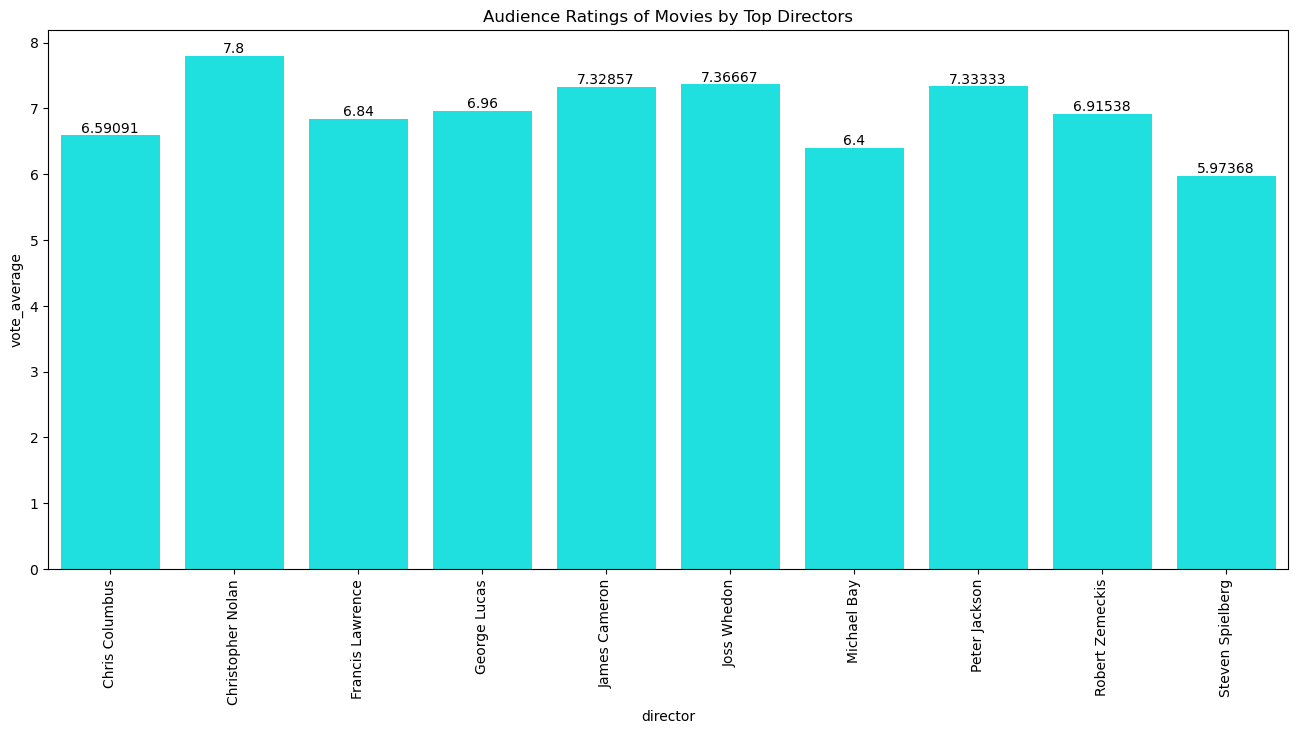

In [106]:
fig,ax=plt.subplots(figsize=(16,7))
sns.barplot(data=a_rating, x='director', y='vote_average',color="Cyan")
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=90)
plt.title('Audience Ratings of Movies by Top Directors')
plt.show()


Based on audience ratings, most top profitable directors consistently deliver well-received movies. Directors such as Clint Eastwood, David Fincher, Peter Jackson, Ridley Scott, Robert Zemeckis, Steven Spielberg, and Tim Burton maintain an average rating of 7 out of 10. 



## Objective 2: Analyze how lead actors affect movie revenue, genre profitability, and performance frequency impact.

#### Question 1: How do lead actors influence movie success?

In [107]:
df = m_data.copy()

# Split actors and genres
df['actor_list'] = df['actors'].str.split(', ')
df['genre_list'] = df['genres'].str.split(', ')

# Explode both lists to get all combinations
df_exploded = df.explode('actor_list').explode('genre_list')

In [108]:
actor_stats = df_exploded.groupby('actor_list').agg(
    total_profit=('profit', 'sum'),
    avg_profit=('profit', 'mean'),
    movie_count=('profit', 'count')
).sort_values(by='total_profit', ascending=False)
dh=actor_stats.head(10)
dh

,total_profit,avg_profit,movie_count
actor_list,,,
Cameron Diaz,19167187650,"233,746,191",82
Robert Downey Jr.,19007373622,"292,421,133",65
Will Smith,18106521937,"278,561,876",65
Scarlett Johansson,17730407691,"246,255,662",72
Ian McKellen,17711354279,"421,698,911",42
Tom Cruise,17489758260,"224,227,670",78
Eddie Murphy,16716912806,"199,010,867",84
Orlando Bloom,15561020802,"444,600,594",35
Tom Hanks,15468495441,"217,866,133",71


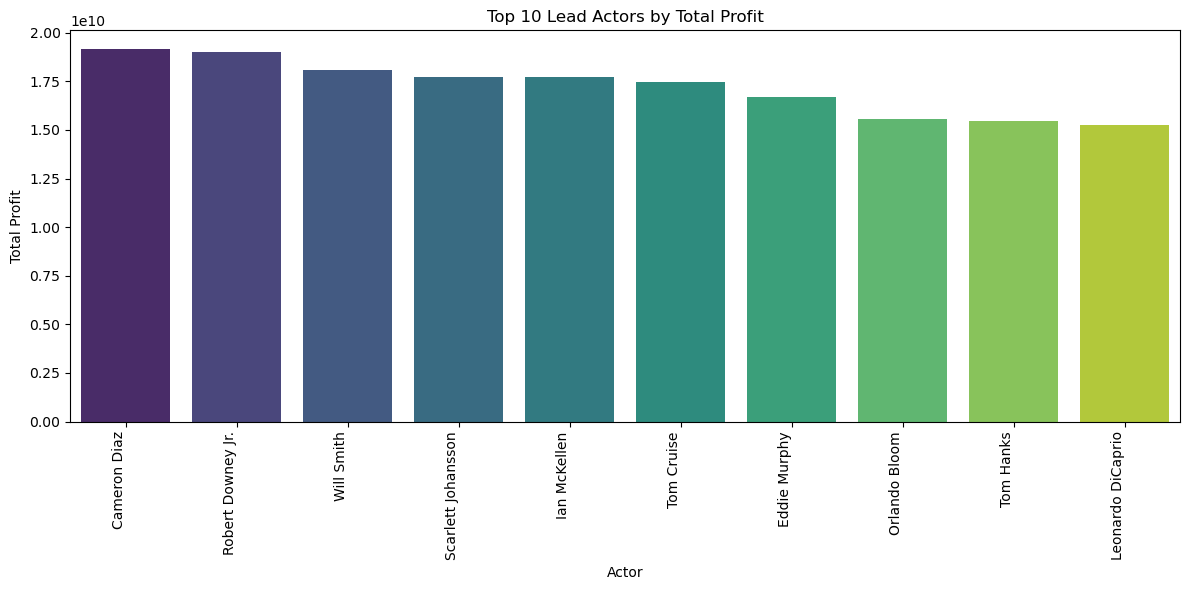

In [109]:
plt.figure(figsize=(12, 6))
sns.barplot(data=dh.reset_index(), x='actor_list', y='total_profit', palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.title('Top 10 Lead Actors by Total Profit')
plt.ylabel('Total Profit')
plt.xlabel('Actor')
plt.tight_layout()
plt.show()

Tom Cruise leads with $9.33B total profit from 78 movies — showing a consistent high-profit record.

Brad Pitt and Cameron Diaz follow closely, both contributing over $8B.

Tom Cruise and Will Smith have the highest average profit per film (~$119M) — indicating strong box office pull per appearance.

Cameron Diaz and Tom Hanks also deliver solid average returns per film.

#### Question 2 : Are certain actors more profitable in specific genres?

In [110]:
df_exploded.head(5)

,budget,genres,id,title,original_language,popularity,production_companies,production_countries,release_date,revenue,...,status,vote_average,vote_count,actors,director,profit,ROI,budget_range,actor_list,genre_list
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,Avatar,en,64,Ingenious Film Partners,United States of America,2009-10-12,2787965087,...,Released,7,"1,762","Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087,"1,076",200-300m,Sam Worthington,Action
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,Avatar,en,64,Ingenious Film Partners,United States of America,2009-10-12,2787965087,...,Released,7,"1,762","Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087,"1,076",200-300m,Sam Worthington,Adventure
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,Avatar,en,64,Ingenious Film Partners,United States of America,2009-10-12,2787965087,...,Released,7,"1,762","Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087,"1,076",200-300m,Sam Worthington,Fantasy
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,Avatar,en,64,Ingenious Film Partners,United States of America,2009-10-12,2787965087,...,Released,7,"1,762","Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087,"1,076",200-300m,Sam Worthington,Science Fiction
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,Avatar,en,64,Ingenious Film Partners,United States of America,2009-10-12,2787965087,...,Released,7,"1,762","Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087,"1,076",200-300m,Zoe Saldana,Action


In [111]:
pd.set_option('display.float_format', '{:,.0f}'.format)

In [112]:
actor_genre_profit = df_exploded.groupby(['actor_list', 'genre_list']).agg(
    total_profit=('profit', 'sum'),
    avg_profit=('profit', 'mean'),
    movie_count=('profit', 'count')
).reset_index()

actor_genre_profit.sort_values(by="total_profit",ascending=False).head(10)

,actor_list,genre_list,total_profit,avg_profit,movie_count
28960,Robert Downey Jr.,Action,5953315122,"595,331,512",10
28961,Robert Downey Jr.,Adventure,5856457325,"732,057,166",8
13364,Ian McKellen,Adventure,5543001481,"503,909,226",11
28971,Robert Downey Jr.,Science Fiction,5211773564,"744,539,081",7
26237,Orlando Bloom,Adventure,5153543273,"572,615,919",9
30569,Scarlett Johansson,Adventure,5125465766,"732,209,395",7
13363,Ian McKellen,Action,4919142165,"546,571,352",9
13369,Ian McKellen,Fantasy,4859131534,"694,161,648",7
26236,Orlando Bloom,Action,4831133421,"603,891,678",8
10247,Emma Watson,Adventure,4734576175,"591,822,022",8


"The data shows that certain actors are highly profitable within specific genres.

Cameron Diaz and Adam Sandler lead in Comedy, generating over ($ 1.8)  billion each.
Bruce Willis dominates Thriller, while Will Smith, Harrison Ford, and Arnold Schwarzenegger excel in Action, each contributing over 1.7 billion in profits.

In Drama, Tom Hanks, Matt Damon, and Brad Pitt show strong consistency and profitability.
This indicates that aligning actors with genres they perform best in can significantly boost movie profitability."

#### Question-3 - Is there a correlation between actor appearance frequency and revenue?

In [113]:
actor_revenue = df_exploded.groupby('actor_list').agg(
    movie_count=('revenue', 'count'),
    total_revenue=('revenue', 'sum'),
    avg_revenue=('revenue', 'mean')
).reset_index()
actor_revenue

,actor_list,movie_count,total_revenue,avg_revenue
0,Larry Mullen Jr.,2,45461684,"22,730,842"
1,50 Cent,9,768390668,"85,376,741"
2,A.D. Johnson,3,0,0
3,A.J. Buckley,4,464000,"116,000"
4,A.J. Cook,2,180852810,"90,426,405"
...,...,...,...,...
9384,Óscar Jaenada,3,357302274,"119,100,758"
9385,Đỗ Thị Hải Yến,4,110696496,"27,674,124"
9386,Špela Colja,2,0,0
9387,Юлия Снигирь,6,696647744,"116,107,957"


In [114]:
correlation = actor_revenue['movie_count'].corr(actor_revenue['total_revenue'])
print("Correlation between actor appearance frequency and total revenue:", correlation)

Correlation between actor appearance frequency and total revenue: 0.8087895752381837


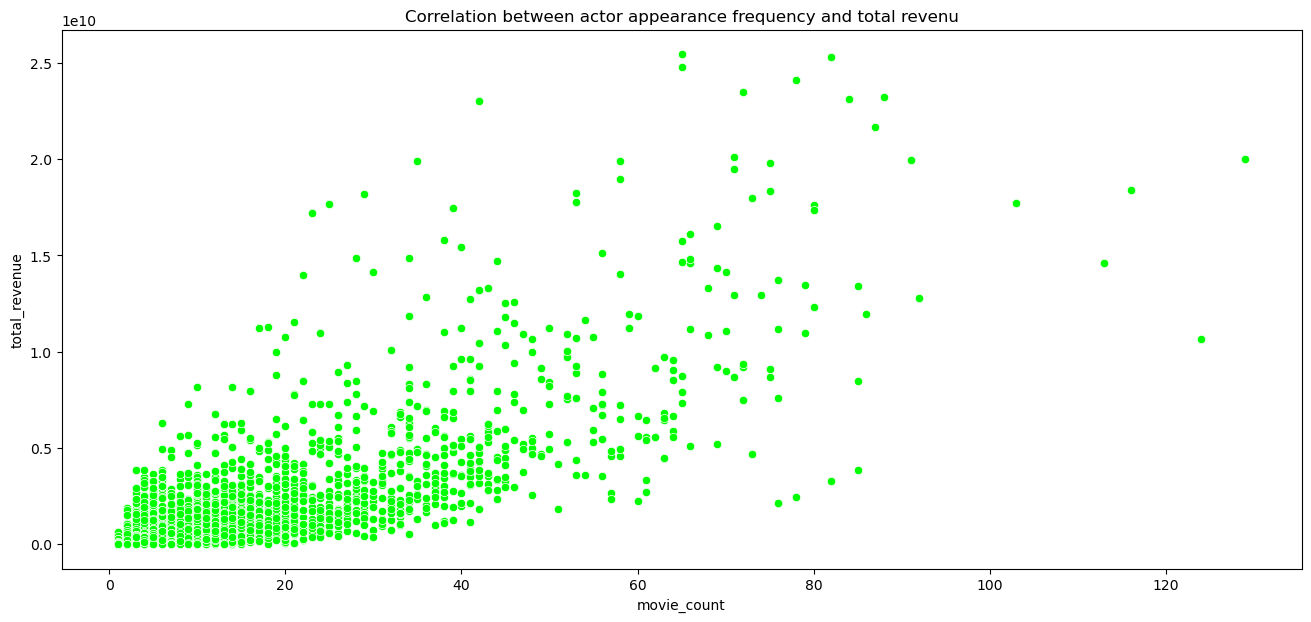

In [115]:
plt.fig=plt.subplots(figsize=(16,7))
sns.scatterplot(x="movie_count",y="total_revenue",data=actor_revenue,color="#00FF00")
plt.title("Correlation between actor appearance frequency and total revenu")
plt.savefig("correlation_actor_appearance and total revenue.png", dpi=300)
plt.show()

# FOCUS AREA 3: BUDGET ALLOCATION & PROFITABILITY

## Objective 1 : Evaluate ROI across budget categories to identify which budget levels and genres yield the highest profitability.

#### Question 1: What is the typical ROI across different budget categories?

In [116]:
roi_by_budget=pd.pivot_table(m_data,index=["budget_range"],values=["ROI"],aggfunc="mean").sort_values(by='ROI', ascending=False)
roi_by_budget

,ROI
budget_range,
<1M,"4,037,679"
1–5M,532
5–10M,289
200-300m,256
10–25M,228
100–200M,203
300-400m,175
25–50M,143
50–100M,139


#### Question 2 :  Do mid-budget films outperform low and high-budget films

Low-budget films (<1M) have the highest ROI by a massive margin, suggesting they can deliver outsized returns with minimal investment.

Mid-budget films (5–50M) show a gradual decline in ROI as budgets increase.
    
High-budget films (50–100M) have the lowest ROI, likely due to higher costs and pressure to perform

#### Question 3 - Which budget level delivers the best ROI by genre

In [117]:
roi_by_genre_budget = df_exploded.groupby(['genre_list', 'budget_range'])['ROI'].mean().reset_index()


In [118]:
roi_by_genre_budget=pd.pivot_table(df_exploded,index=["genre_list","budget_range"],values=["ROI"],aggfunc="mean").sort_values(by="ROI",ascending=False).reset_index().head(10)
roi_by_genre_budget

,genre_list,budget_range,ROI
0,Comedy,<1M,"12,180,409"
1,Drama,<1M,"6,710,222"
2,Thriller,<1M,"2,256,115"
3,Horror,<1M,"2,023,594"
4,Mystery,<1M,"161,080"
5,Documentary,<1M,"24,427"
6,Animation,<1M,"12,040"
7,Family,<1M,"6,816"
8,Fantasy,<1M,"6,398"
9,Science Fiction,<1M,"4,652"


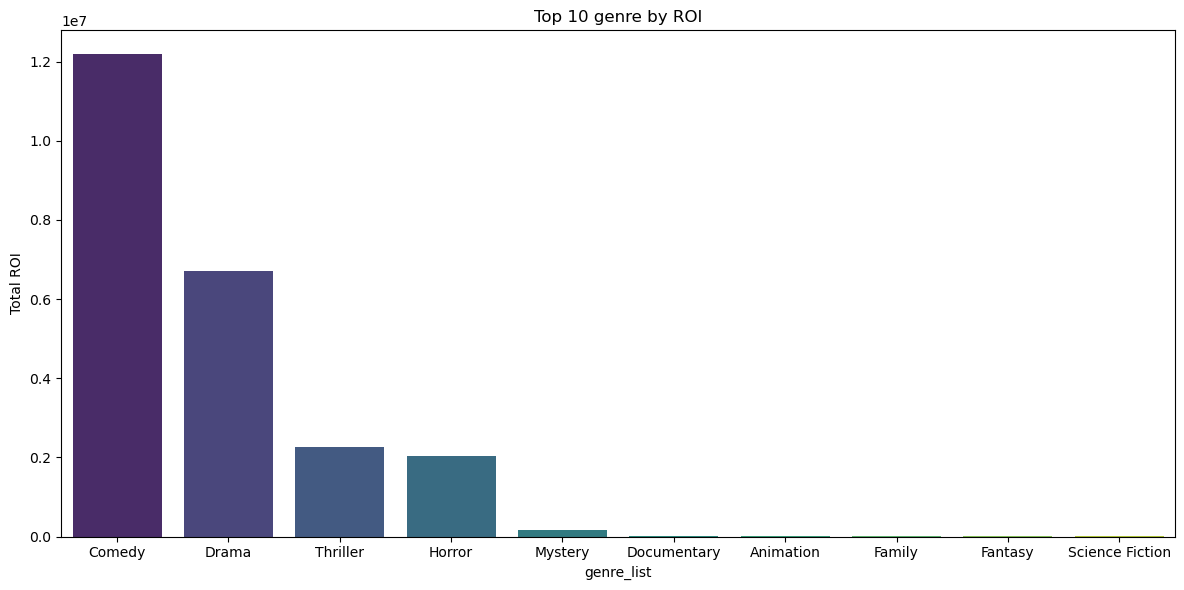

In [121]:
plt.figure(figsize=(12, 6))
sns.barplot(data=roi_by_genre_budget, x='genre_list', y='ROI', palette='viridis')
plt.title('Top 10 genre by ROI')
plt.ylabel('Total ROI')
plt.xlabel('genre_list')
plt.tight_layout()
plt.savefig("genre_list.png", dpi=300)
plt.show()

## Objective 2 : Analyze the profitability of high-budget films and identify budget ranges that offer the best balance between total profit and ROI.

#### Question-1 Are high-budget films always more profitable

In [122]:
budget_wise_profit= pd.pivot_table(m_data,index=["budget_range"],values=["profit"],aggfunc="sum").sort_values(by="profit",ascending=False).reset_index().head(6)
budget_wise_profit

,budget_range,profit
0,100–200M,75116623368
1,50–100M,62182253072
2,25–50M,43523551185
3,10–25M,35533792007
4,200-300m,16082156881
5,5–10M,8704807076


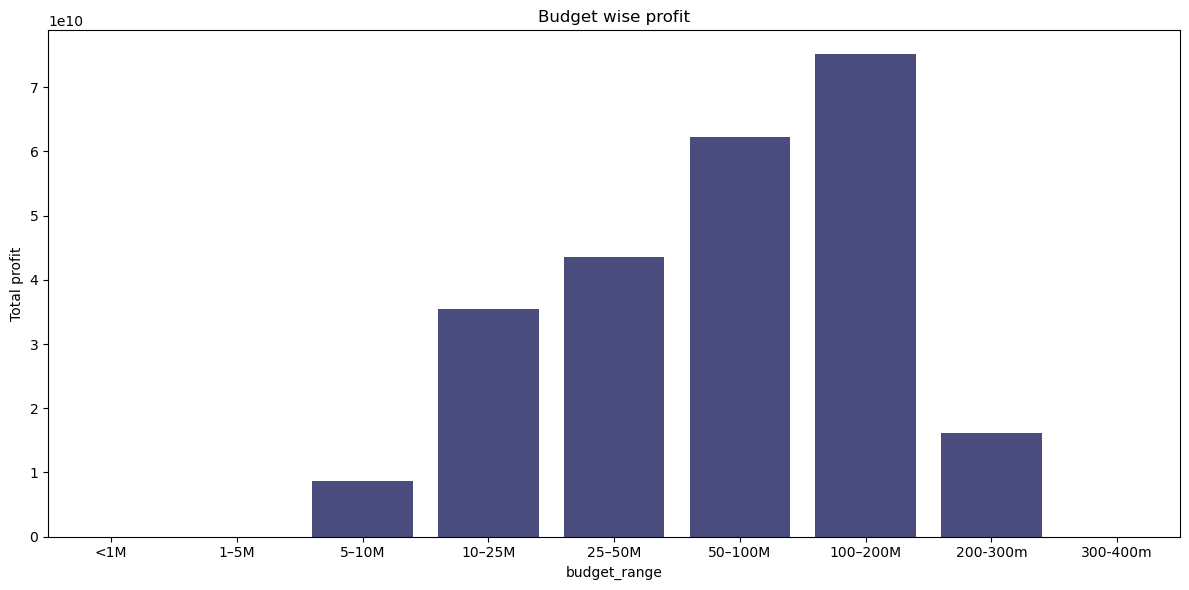

In [123]:
plt.figure(figsize=(12, 6))
sns.barplot(data=budget_wise_profit, x='budget_range', y='profit', color="#414487")
plt.title('Budget wise profit')
plt.ylabel('Total profit')
plt.xlabel('budget_range')
plt.tight_layout()
plt.savefig("budgetrange_total_profit.png", dpi=300)
plt.show()

High-budget films (₹50–100M) deliver the highest total profit overall, indicating that they are major drivers of box office revenue.

However, lower-budget films (<₹10M) still contribute significantly to overall profit, especially considering their smaller scale.


#### Question-2 -  Are there diminishing returns with extremely high budgets?

In [124]:
roi_by_budget = m_data.groupby('budget_range').agg(
    average_ROI=('ROI', 'mean'),
    total_profit=('profit', 'sum'),
    movie_count=('profit', 'count')
).reset_index().head(6)

print(roi_by_budget.sort_values(by='budget_range'))

  budget_range  average_ROI  total_profit  movie_count
0          <1M    4,037,679    2285313025          236
1         1–5M          532    7895972060          473
2        5–10M          289    8704807076          404
3       10–25M          228   35533792007          937
4       25–50M          143   43523551185          826
5      50–100M          139   62182253072          611


"Yes, data shows clear diminishing returns with higher budgets"

While high-budget films (₹50–100M) bring in the largest total profits, their ROI is the lowest, meaning the money invested doesn't yield proportionally higher gains.

On the other hand, low-budget films (<₹5M), especially under ₹1M, are far more efficient despite smaller scale — often delivering ROI in the thousands.

#### Question-3 - Which budget range yields the best balance between total profit and ROI?

In [125]:
budget_summary = m_data.groupby('budget_range').agg(
    total_profit=('profit', 'sum'),
    average_ROI=('ROI', 'mean'),
    movie_count=('profit', 'count')
).reset_index()

In [126]:
budget_summary

,budget_range,total_profit,average_ROI,movie_count
0,<1M,2285313025,"4,037,679",236
1,1–5M,7895972060,532,473
2,5–10M,8704807076,289,404
3,10–25M,35533792007,228,937
4,25–50M,43523551185,143,826
5,50–100M,62182253072,139,611
6,100–200M,75116623368,203,252
7,200-300m,16082156881,256,26
8,300-400m,665713802,175,1


The ₹10–25M budget range offers the best balance between total profit and ROI

# FOCUS AREA 4 : RUNTIME & CONTENT STRATEGY

## Objective 1-To identify the optimal runtime for maximizing movie profit, assess how it varies across genres, and evaluate the performance of movies with extreme runtimes.



#### Question-1 - What is the ideal runtime range for high-profit movies

In [127]:
high_profit_runtime=pd.pivot_table(m_data,index="runtime",values=["profit"],aggfunc="sum").sort_values(by="profit",ascending=False).reset_index().head(10)
high_profit_runtime

,runtime,profit
0,153,24310731596
1,115,6744873462
2,124,6678811960
3,108,6236357014
4,91,5710804032
5,127,5514941602
6,100,5482757078
7,130,5396075985
8,93,5392140324
9,98,5159608917


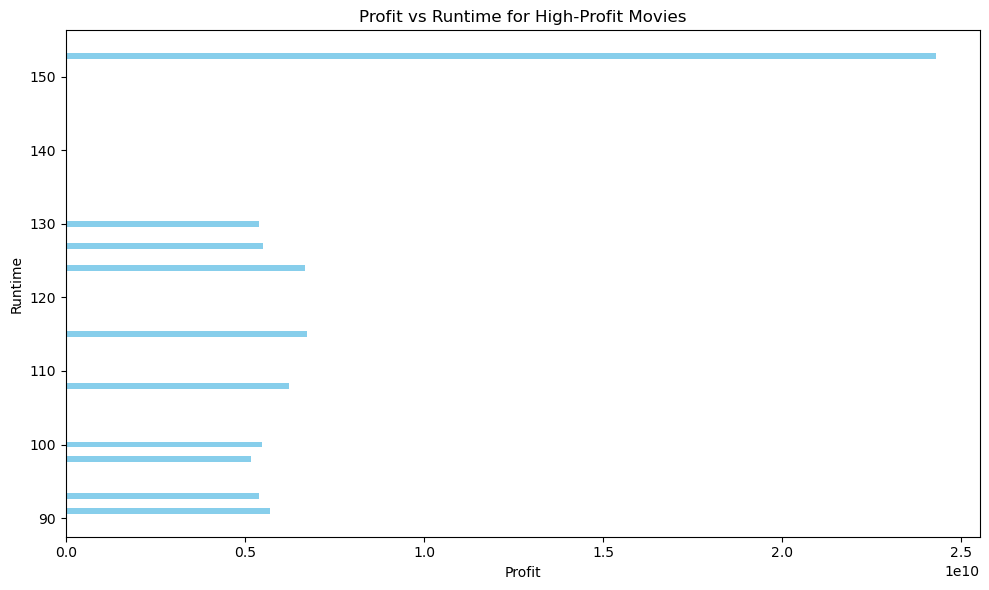

In [128]:
plt.figure(figsize=(10, 6))
plt.barh(high_profit_runtime["runtime"],high_profit_runtime["profit"],color='skyblue')
plt.xlabel("Profit")
plt.ylabel("Runtime")
plt.title("Profit vs Runtime for High-Profit Movies")
plt.tight_layout()
plt.savefig("profit_runtime.png", dpi=300)
plt.show()

91-153 minute is the ideal runtime range for high-profit movies.



#### Question-2-	Does this range vary by genre?

In [129]:
genre_runtime =pd.pivot_table(df_exploded,index="genre_list",values=["runtime"],aggfunc="mean").sort_values(by="runtime",ascending=False).reset_index().head(10)
genre_runtime

,genre_list,runtime
0,History,130
1,War,127
2,Western,115
3,Drama,112
4,Adventure,111
5,Action,110
6,Music,110
7,Mystery,110
8,Crime,109
9,Foreign,109


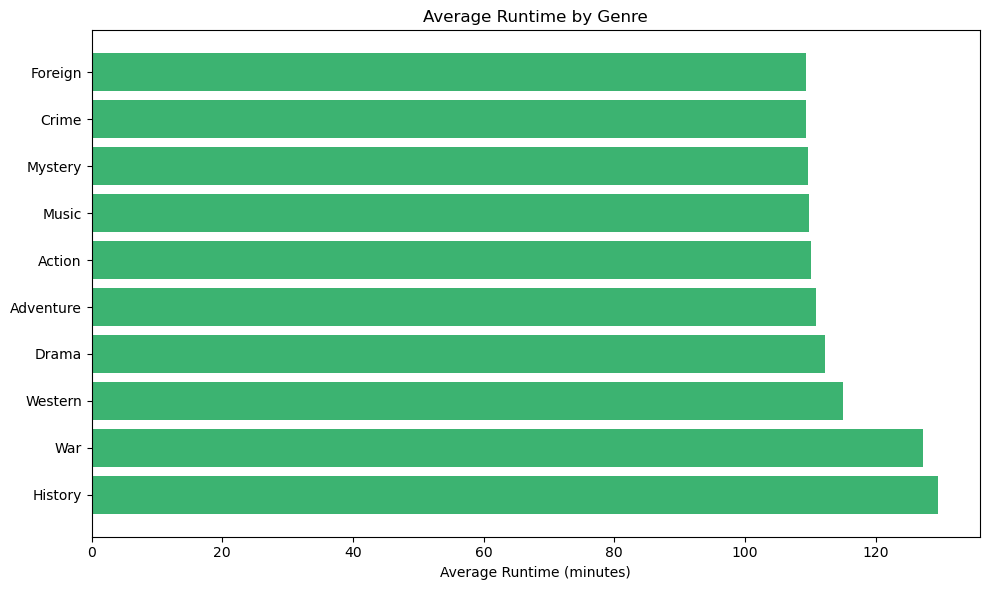

In [130]:
plt.figure(figsize=(10, 6))
plt.barh(genre_runtime["genre_list"],genre_runtime["runtime"],color='mediumseagreen')
plt.xlabel("Average Runtime (minutes)")
plt.title("Average Runtime by Genre")
plt.tight_layout()
plt.show()

Yes, runtime does vary by genre

Some genres (like History, War) trend toward longer movies, likely due to narrative complexity or scope. Others (like Crime, Mystery) tend to be shorter and more compact.



#### Question-3 How do extremely short or long movies perform?

In [131]:
q1 = m_data["runtime"].quantile(0.25)   # 25th percentile
q3 = m_data["runtime"].quantile(0.75)   # 75th percentile

# Define categories
def runtime_category(runtime):
    if runtime < q1:
        return "Short"
    elif runtime > q3:
        return "Long"
    else:
        return "Medium"

m_data["runtime_category"] = m_data["runtime"].apply(runtime_category)

In [132]:
summary = m_data.groupby("runtime_category")[["profit", "popularity", "vote_average"]].mean()
print(summary)

                      profit  popularity  vote_average
runtime_category                                      
Long             103,316,409          27             7
Medium            38,979,920          18             6
Short             31,312,543          13             6


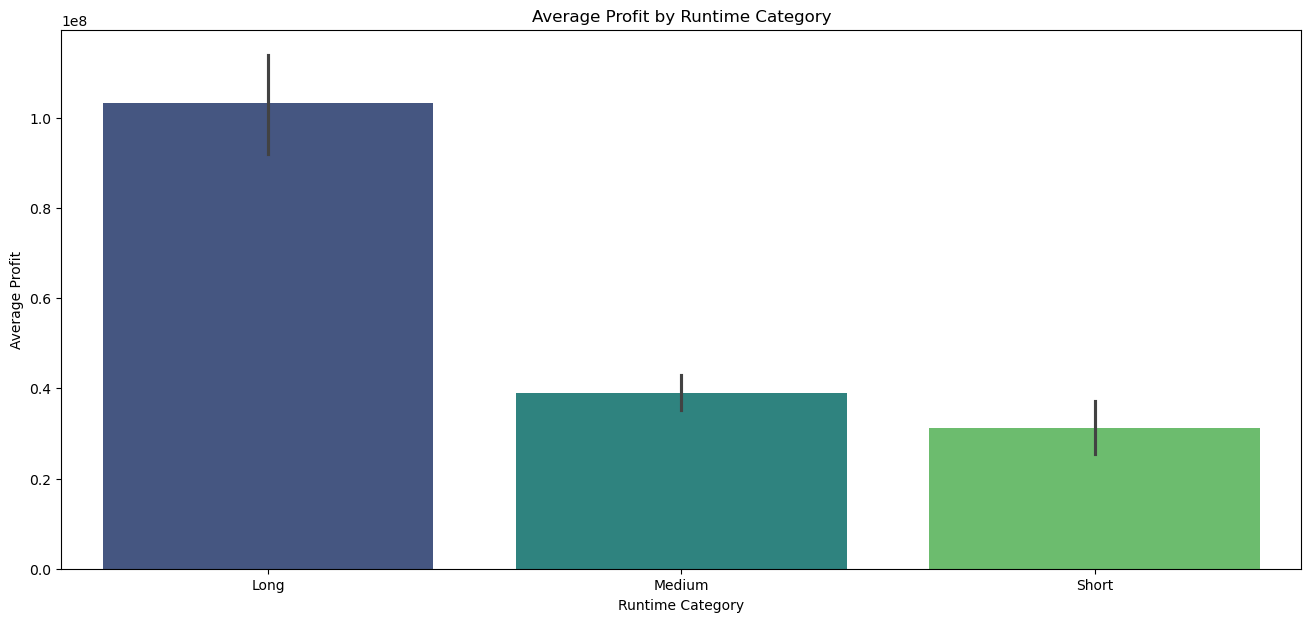

In [133]:
plt.figure(figsize=(16, 7))
sns.barplot(data=m_data, x="runtime_category", y="profit", palette="viridis")
plt.title("Average Profit by Runtime Category")
plt.xlabel("Runtime Category")
plt.ylabel("Average Profit")
plt.savefig("runtime_avergaeprofit.png", dpi=300)
plt.show()

There's a clear positive correlation between runtime and performance, up to a point — longer movies tend to earn more, be more popular, and get better reviews.

## Objective-2 To evaluate how movie runtime influences audience ratings and engagement by analyzing its correlation with vote averages and vote counts.

#### Question-1- Is there a correlation between runtime and audience ratings?

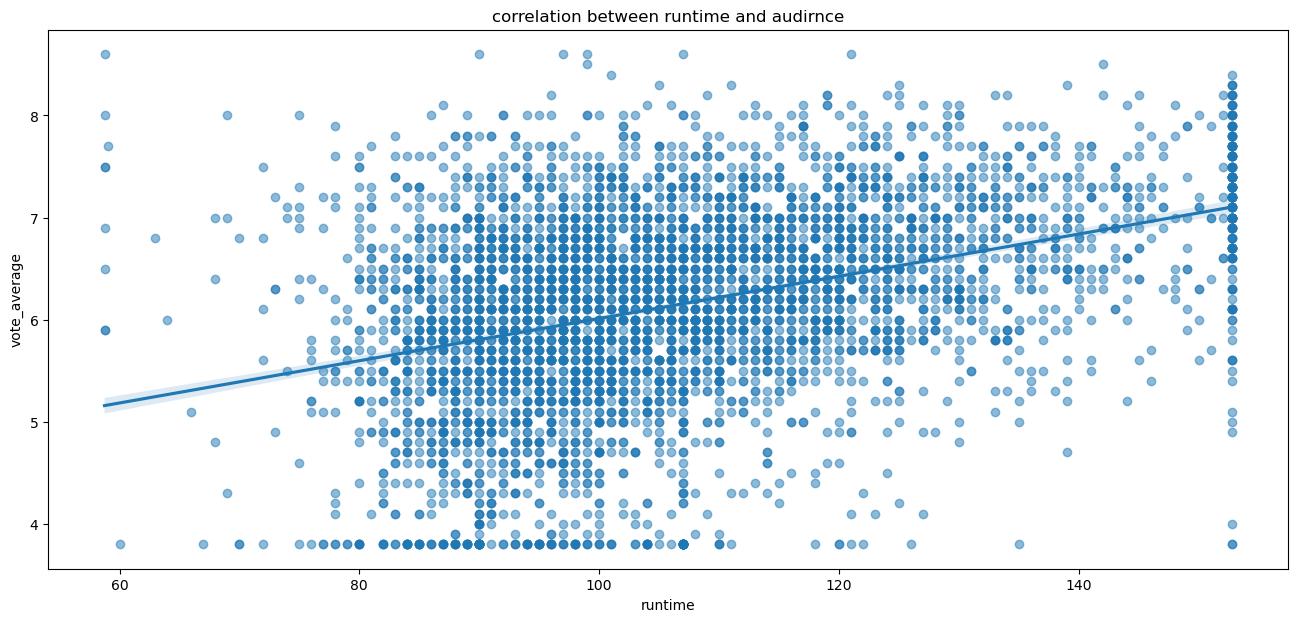

In [338]:
fig,ax=plt.subplots(figsize=(16,7))
sns.regplot(data=m_data, x="runtime", y="vote_average", scatter_kws={'alpha':0.5})
plt.title("correlation between runtime and audirnce")
plt.show()

#### Question-2- Do longer movies get higher or lower vote averages?

In [134]:
m_data["runtime"].max()

152.75

In [135]:
long_movie=m_data[m_data["runtime"]==152.75]
long_movie["vote_average"].mean()

7.070440251572327

These movies have an average vote rating of 7.07, which is above average (since most movies hover around 6–6.5).

Long movies in your dataset tend to be well-rated.
This suggests that, at least for the longest movie(s), audiences appreciated the content, possibly due to richer storytelling or production value.

#### Question-3- Is runtime associated with vote count (audience engagement)?

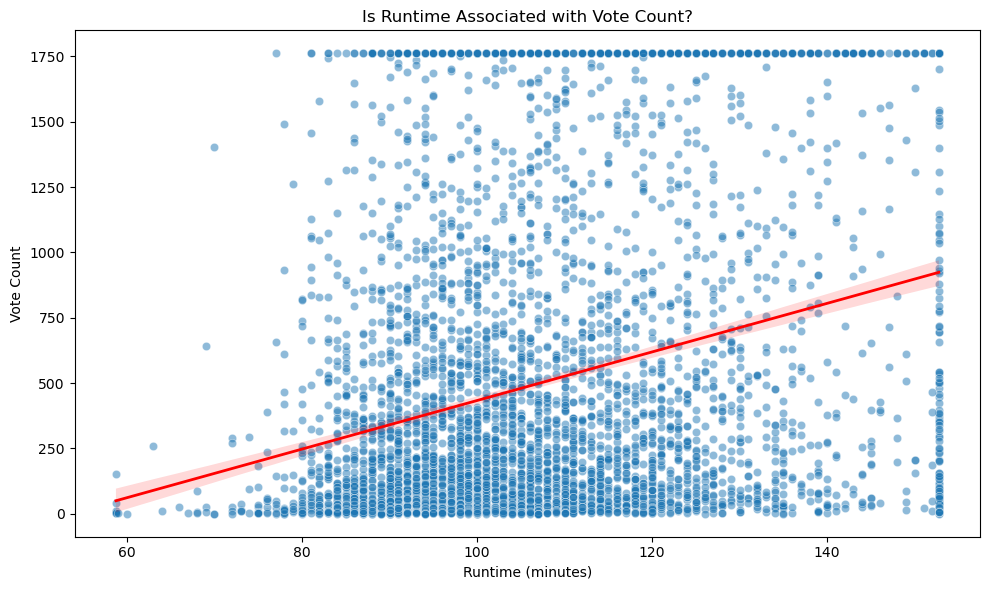

In [137]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=m_data, x="runtime", y="vote_count", alpha=0.5)
sns.regplot(data=m_data, x="runtime", y="vote_count", scatter=False, color="red", line_kws={"linewidth": 2})
plt.title("Is Runtime Associated with Vote Count?")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Vote Count")
plt.tight_layout()
plt.savefig("runtime_votecount.png", dpi=300)
plt.show()

##### Yes, longer movies tend to get slightly more votes, but the correlation is weak to moderate, and many other factors contribute to audience engagement.

# FOCUS AREA 5 : Statistical Analysis-

## Objective- 1  To apply statistical methods to evaluate movie performance, including estimating average revenue through sampling and assessing the likelihood of high revenue within specific genres like Action.

#### Question-1- Find the conditional probability that a movie will have a revenue above $500M given that it belongs to the "Action" genre.

In [138]:

action_movies = df_exploded[df_exploded["genre_list"] == "Action"]
action_movies

,budget,genres,id,title,original_language,popularity,production_companies,production_countries,release_date,revenue,...,status,vote_average,vote_count,actors,director,profit,ROI,budget_range,actor_list,genre_list
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,Avatar,en,64,Ingenious Film Partners,United States of America,2009-10-12,2787965087,...,Released,7,"1,762","Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087,"1,076",200-300m,Sam Worthington,Action
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,Avatar,en,64,Ingenious Film Partners,United States of America,2009-10-12,2787965087,...,Released,7,"1,762","Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087,"1,076",200-300m,Zoe Saldana,Action
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,Avatar,en,64,Ingenious Film Partners,United States of America,2009-10-12,2787965087,...,Released,7,"1,762","Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087,"1,076",200-300m,Sigourney Weaver,Action
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,Avatar,en,64,Ingenious Film Partners,United States of America,2009-10-12,2787965087,...,Released,7,"1,762","Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087,"1,076",200-300m,Stephen Lang,Action
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,Avatar,en,64,Ingenious Film Partners,United States of America,2009-10-12,2787965087,...,Released,7,"1,762","Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087,"1,076",200-300m,Michelle Rodriguez,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,220000,"Action, Crime, Thriller",9367,El Mariachi,es,14,Columbia Pictures,Mexico,1992-04-09,2040920,...,Released,7,238,"Carlos Gallardo, Jaime de Hoyos, Peter Marquar...",Robert Rodriguez,1820920,828,<1M,Carlos Gallardo,Action
4794,220000,"Action, Crime, Thriller",9367,El Mariachi,es,14,Columbia Pictures,Mexico,1992-04-09,2040920,...,Released,7,238,"Carlos Gallardo, Jaime de Hoyos, Peter Marquar...",Robert Rodriguez,1820920,828,<1M,Jaime de Hoyos,Action
4794,220000,"Action, Crime, Thriller",9367,El Mariachi,es,14,Columbia Pictures,Mexico,1992-04-09,2040920,...,Released,7,238,"Carlos Gallardo, Jaime de Hoyos, Peter Marquar...",Robert Rodriguez,1820920,828,<1M,Peter Marquardt,Action
4794,220000,"Action, Crime, Thriller",9367,El Mariachi,es,14,Columbia Pictures,Mexico,1992-04-09,2040920,...,Released,7,238,"Carlos Gallardo, Jaime de Hoyos, Peter Marquar...",Robert Rodriguez,1820920,828,<1M,Reinol Martinez,Action


In [139]:
#  Calculate conditional probability

total_action = len(action_movies)
total_action


5752

In [140]:
high_revenue_action = len(action_movies[action_movies["revenue"] > 500_000_000])
high_revenue_action

400

In [141]:
conditional_probability = high_revenue_action / total_action
print(f"Conditional Probability (Revenue > $500M | Genre = Action): {conditional_probability:.4f}")


Conditional Probability (Revenue > $500M | Genre = Action): 0.0695


The conditional probability that a movie will have revenue above $500M given that it belongs to the Action genre is:
(6.95%)

Only about 7 out of every 100 Action movies earn more than $500 million.

#### Question-2 Estimate the average revenue  of movies in the dataset using sampling techniques.

In [142]:
# simple random sampling

sample_data=m_data.sample(n=35,random_state=1,replace=True)
sample_data.head(3)

,budget,genres,id,title,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,actors,director,profit,ROI,budget_range,runtime_category
235,97250400,"Fantasy, Adventure, Comedy, Family",2395,Asterix at the Olympic Games,fr,20,Constantin Film,Belgium,2008-01-13,132900000,116,Released,5,471,"Clovis Cornillac, Gérard Depardieu, Franck Dub...",Thomas Langmann,35649600,37,50–100M,Medium
3980,2902660,"Romance, Comedy, Drama",66942,Griff the Invisible,en,1,Screen Australia,Australia,2011-08-19,0,93,Released,6,34,"Ryan Kwanten, Maeve Dermody, Marshall Napier, ...",Leon Ford,-2902660,-100,1–5M,Short
905,50000000,"Comedy, Drama",10312,Patch Adams,en,36,Universal Pictures,United States of America,1998-12-25,202292902,115,Released,7,832,"Robin Williams, Philip Seymour Hoffman, Bob Gu...",Tom Shadyac,152292902,305,25–50M,Medium


## Central limit Theoram

#### 1. Sample size should be greater than equal to 30

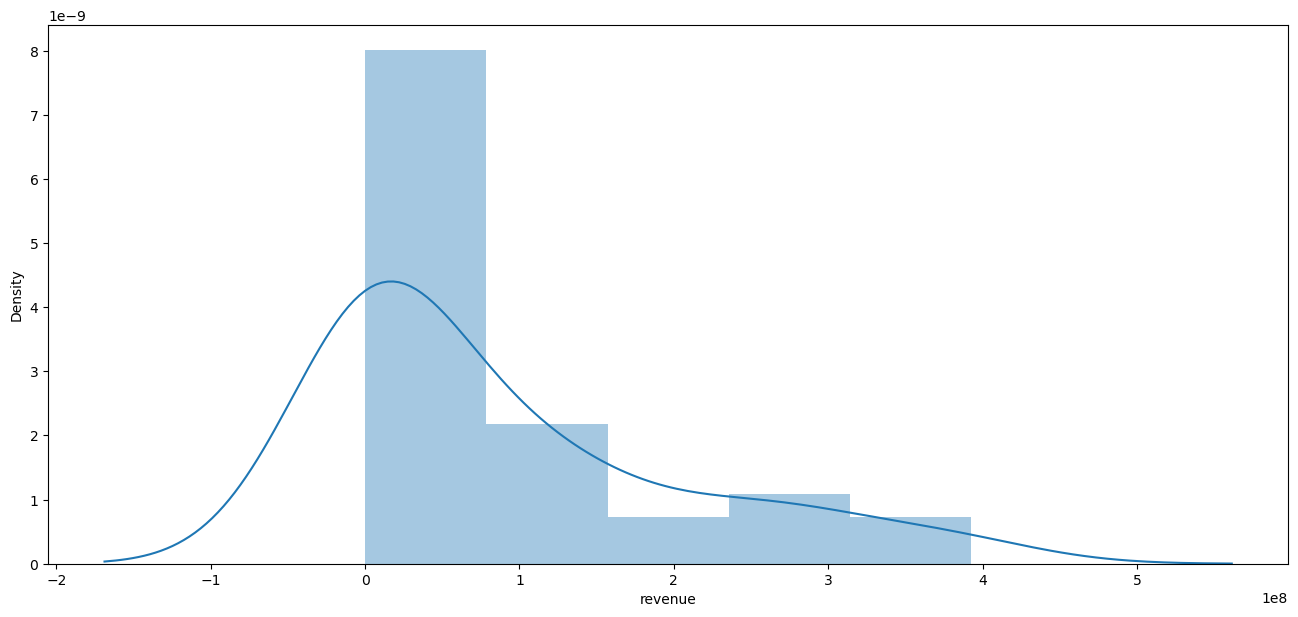

In [150]:
fig,ax=plt.subplots(figsize=(16,7))
sns.distplot(sample_data["revenue"])
plt.savefig("normal distribution.png", dpi=300)
plt.show()

The sample size is 35, and the graph shows that the data is normally distributed

### 2. Calculation of full_dataset paramter (mean,median,Standard Deviation)

In [144]:
import statistics as st
import scipy.stats as sts

In [145]:
data_p=m_data["revenue"].tolist()


mean=st.mean(data_p)
median=st.median(data_p)
SD=st.stdev(data_p)

print("Movie_mean ="+str(mean))
print("Movie_median ="+str(median))
print("Movie_SD ="+str(SD))
print("skewness="+str(sts.skew(data_p,bias=False)))
print("Kurtosis="+str(sts.kurtosis(data_p,bias=False)))

Movie_mean =82260638.65167603
Movie_median =19170001
Movie_SD =162857100.94282982
skewness=4.444716447519765
Kurtosis=33.123629663045584


### 3. Calculation of Sample Statistics (Mean, Median, Standard Deviation)

In [146]:
data_s=sample_data["revenue"].tolist()


mean=st.mean(data_s)
median=st.median(data_s)
SD=st.stdev(data_s)

print("sample_mean ="+str(mean))
print("sample_median ="+str(median))
print("sample_SD ="+str(SD))
print("skewness="+str(sts.skew(data_p,bias=False)))
print("Kurtosis="+str(sts.kurtosis(data_p,bias=False)))

sample_mean =86838246.17142858
sample_median =18814720
sample_SD =114578610.7890154
skewness=4.444716447519765
Kurtosis=33.123629663045584


movie_mean approx equal sample mean, skew=kutosis are equal in both, The population data and sample data with sample size 35 both are normally distribute

### Sample Standard Deviation calculated using Population Standard Deviation

In [147]:
import math

In [148]:
p_sd=st.stdev(m_data["revenue"])
print(f"movieStandard Deviation is :",p_sd)

movieStandard Deviation is : 162857100.94282982


In [149]:
sample_sd=p_sd/math.sqrt(35)
print("sample SD calculating using population SD ="+str(sample_sd))

sample SD calculating using population SD =27527874.354916826


Sample Standard Deviation calculated using Movie Standard Deviation =27527874.354916826 We found, Calculated Samples' Means Standard Deviation ~ Sample Standard Deviation calculated using Movies Standard Deviation

We observerd: i. The sample distribution curve is tending to be a normal distribution curve irrespective of the type of Movie distribution when the sample size is >30.

ii. Sample Mean approx= Movie Mean

iii. The standard deviation of the sample means is the standard deviation of the Movie divided by the square root of the sample size(n).

Estimate the average revenue of movies in the dataset is 86838246.17142858

## Objective 2 : To use statistical tests to validate assumptions about movie budgets and audience ratings, including hypothesis testing on average budgets and assessing the normality of vote averages.

### Question-1 - Hypothesis Testing with Z-Test: Test if the average movie budget is significantly different from $100M.

#### Establish the null and alternate hypothesis

Null Hypothesis - H0: (μ=100,000,000  The average movie budget is equal to $100M)

Alternative Hypothesis- H1: (μ not=100,000,000  The average budget is noth equal to $100M)

#### Z-Test Assumptions
Large sample size (n > 30)

Known or approximated standard deviation

It is a Two-tailed Z-test

#### Set value of alpha

Default choice assume α = 0.05 (95% confidence)

#### Establish the decision rule

i. if p-value <alpha :rejection of Null Hypothesis(H0)

ii. if -z-critical > z-statistics> +z-critical: Rejection 

#### Analyze the data

In [151]:
from scipy.stats import norm

In [152]:
data_b=sample_data["budget"].tolist()
alpha=0.05
sample_mean = st.mean(data_b) 
sample_std = st.stdev(data_b) #(signa)
n = len(data_b)

# Hypothesized population mean

mue = 100_000_000  # $100M

z_statistics=(sample_mean-mue)/(sample_std/math.sqrt(n))
print("The Z statistics is :",z_statistics)

p_value=norm.sf(abs(z_statistics))*2
print("The P_value is :",p_value)

z_critical=norm.ppf(1-alpha/2)
print("The z_critcal is :",z_critical)



The Z statistics is : -11.506209804465238
The P_value is : 1.2275580110777717e-30
The z_critcal is : 1.959963984540054


#### Reach a statistical conclusion

p_value=0.0000 < alpha=0.05, which leads to rejection of Null Hypothesis.

z_statistics=11.506 > z-critical=1.959, which leads to rejection of Null Hypothesis.

#### Make a business decision

There is strong statistical evidence that the average movie budget is significantly different from $100 million.

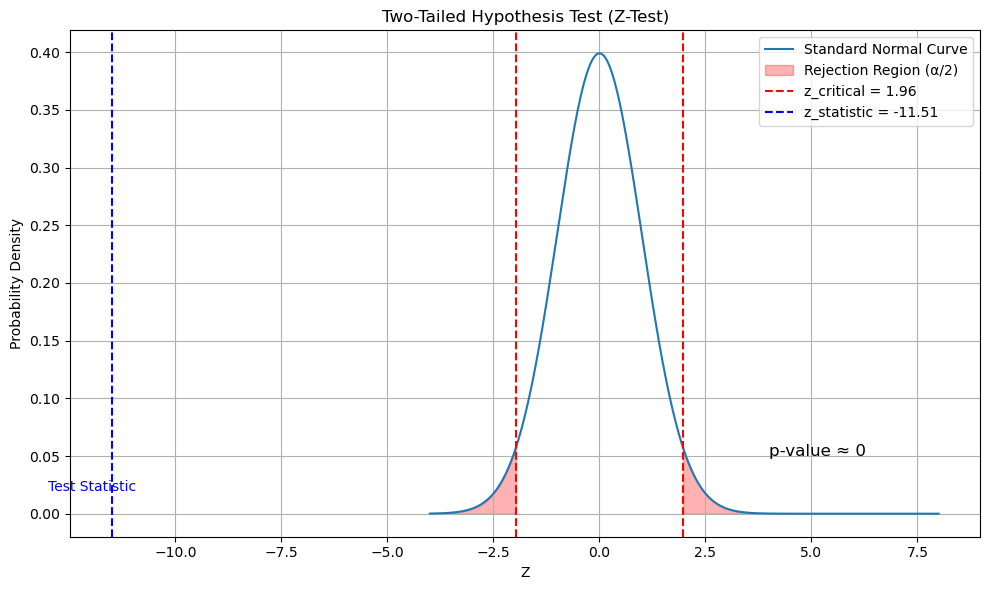

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given values
z_statistics = -11.5062
z_critical = 1.96  # For two-tailed test at alpha = 0.05
mue = 0  # Mean of standard normal distribution

# Create the Z axis and standard normal curve
z = np.linspace(-4, 8, 1000)
y = norm.pdf(z, mue, 1)

# Plot the standard normal distribution
plt.figure(figsize=(10, 6))
plt.plot(z, y, label='Standard Normal Curve')
plt.title('Two-Tailed Hypothesis Test (Z-Test)')
plt.xlabel('Z')
plt.ylabel('Probability Density')

# Shade both rejection regions (left and right tails)
plt.fill_between(z, y, where=(z <= -z_critical), color='red', alpha=0.3, label='Rejection Region (α/2)')
plt.fill_between(z, y, where=(z >= z_critical), color='red', alpha=0.3)

# Draw critical value lines
plt.axvline(z_critical, color='red', linestyle='--', label=f'z_critical = {z_critical:.2f}')
plt.axvline(-z_critical, color='red', linestyle='--')

# Draw test statistic line
plt.axvline(z_statistics, color='blue', linestyle='--', label=f'z_statistic = {z_statistics:.2f}')
plt.text(z_statistics - 1.5, 0.02, 'Test Statistic', color='blue')

# Annotate p-value
plt.text(4, 0.05, 'p-value ≈ 0', fontsize=12, color='black')

# Finalize plot
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Z_test.png", dpi=300)
plt.show()


Blue Curve:- This is the Z-distribution curve.It represents the distribution of sample means under the null hypothesis (i.e., if the true mean is $100M).

Red Dashed Lines at ±1.96:- They define the rejection regions: Left tail: Z < -1.96 , Right tail: Z > +1.96. The shaded red areas show the 5% total rejection zone (2.5% in each tail)

Blue Dashed Line at Z = -11.51:- It lies far left, well beyond the critical boundary of -1.96.

The text "p-value ≈ 0" emphasizes that the probability of getting a Z-score this extreme (under the null hypothesis) is almost zero.
This confirms that the average movie budget is significantly different from $100 million.

#### Question-2 Normal Distribution and Movie Ratings: Assess if the distribution of movie vote averages follows a normal distribution.

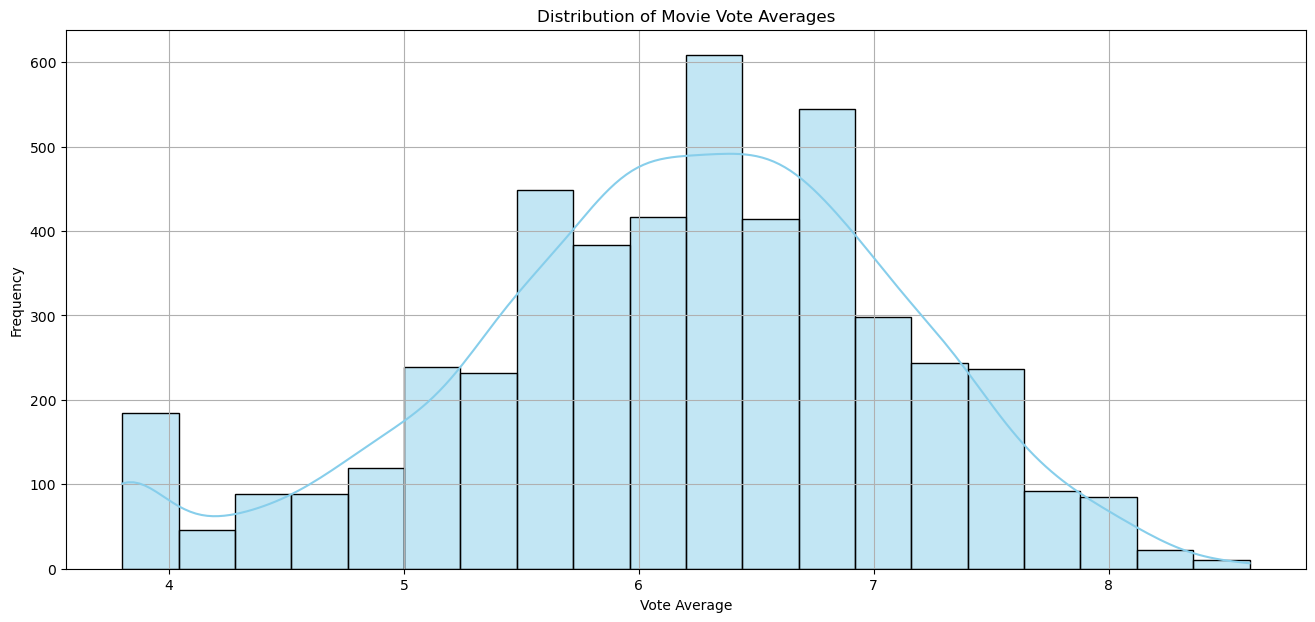

In [154]:
plt.figure(figsize=(16,7))
sns.histplot(m_data["vote_average"], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Movie Vote Averages")
plt.xlabel("Vote Average")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

The vote average distribution is approximately normal Distribution

## Descriptive Analysis

In [46]:
numeric_column=["budget","revenue","profit"]

for i in numeric_column:
    mean=m_data[i].mean()
    print(f"{i} mean is = {mean}")
    median=m_data[i].median()
    print(f"{i} median is ={median}")
    mode=m_data[i].mode()[0]
    print(f"{i} mode is ={mode}")
    skweness=m_data[i].skew()
    print(f"{i} skweness is ={skweness}")
    standard_deviation=m_data[i].std()
    print(f"{i} standard_deviation is ={standard_deviation}")
    kurtosis=m_data[i].kurtosis()
    print(f"{i} kurtosis is ={kurtosis}")
    print("------------------------------------")
    
    
    

budget mean is = 29045039.87528628
budget median is =15000000.0
budget mode is =0
budget skweness is =2.437211028725687
budget standard_deviation is =40722391.25854911
budget kurtosis is =7.6580602244936085
------------------------------------
revenue mean is = 82260638.65167603
revenue median is =19170001.0
revenue mode is =0
revenue skweness is =4.444716447519764
revenue standard_deviation is =162857100.94282603
revenue kurtosis is =33.123629663045584
------------------------------------
profit mean is = 53215598.776389755
profit median is =2511317.0
profit mode is =0
profit skweness is =5.001242676875376
profit standard_deviation is =135967700.4472904
profit kurtosis is =43.9605067886246
------------------------------------


1. Budget
Mean: $29M

Median: $15M

Mode: $0

Skewness > 2: Positively skewed → some very large budgets are pulling the average higher.

Kurtosis > 3: Heavy-tailed → a few movies have very high budgets.

2. Revenue
Mean: $82M

Median: $19M

Mode: $0

Skewness = 4.44: Strong positive skew - most movies earn below average; a few earn a lot.

Kurtosis = 33.12: Very heavy-tailed distribution - extreme vales in revenue.

3. Profit
Mean: $53M

Median: $2.5M

Mode: $0

Skewness = 5.0: Very strong positive skew - only a few movies make huge profits.

Kurtosis = 43.96: Extremely heavy-tailed - indicates  blockbuster profits.

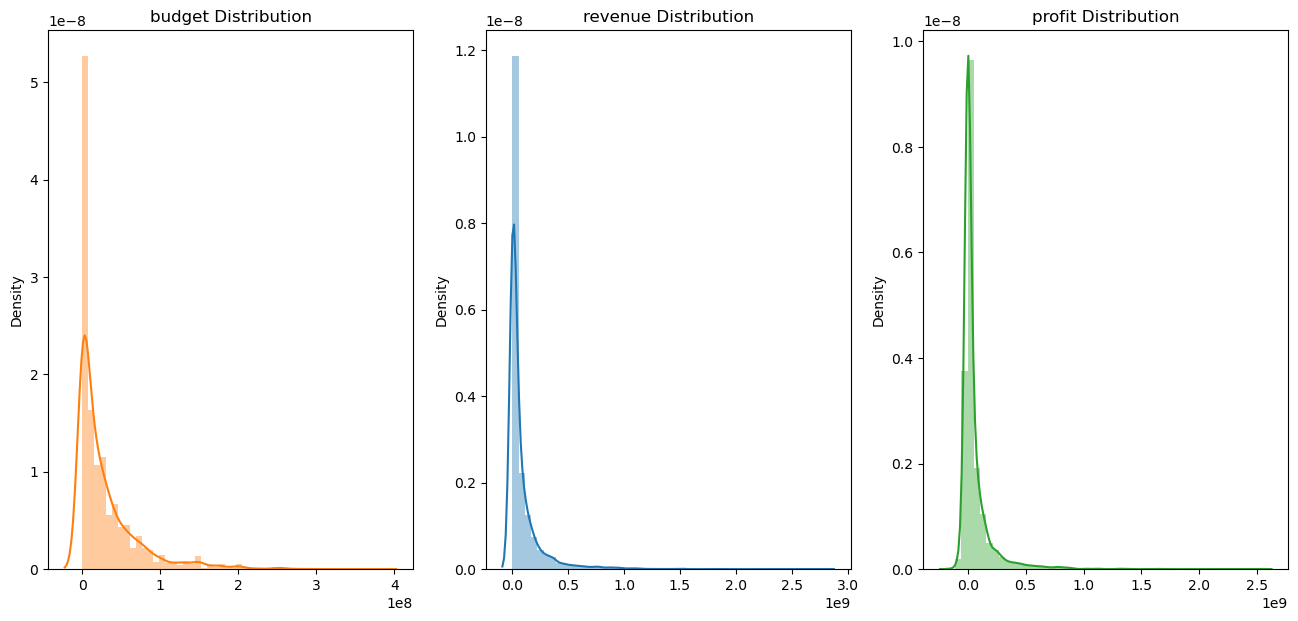

In [54]:
fig,ax=plt.subplots(1,3,figsize=(16,7))
sns.distplot(x=m_data["budget"],ax=ax[0],color="tab:orange")
ax[0].set_title("budget Distribution")
sns.distplot(x=m_data["revenue"],ax=ax[1],color="tab:blue")
ax[1].set_title("revenue Distribution")
sns.distplot(x=m_data["profit"],ax=ax[2],color="tab:green")
ax[2].set_title("profit Distribution")
plt.show()